In [116]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [117]:
df=pd.read_csv("C:/Users/a856994/Downloads/datascienceassignment/pca/wine.csv")

In [118]:
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [119]:
df.shape

(178, 14)

In [120]:
df.tail()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
173           0.52             1.06    7.7  0.64      1.74      740  
174           0.43             1.41    7.3  0.70      1.56      750  
175           0.43             1.35   10.2  0.59      1.56      835  
176           0.53             1.46    9.3  0.60      1.62      840  
177           0.56             1.35    9.2  0.61      1.60      560

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [122]:
df.corr()

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Proline         -0.633717  0.643720 -0.192011  0.223626   -0.440597   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.209179 -0.719163   -0.847498       0.489109   
Alcohol           0.270798  0.289101    0.236815      -0.155929   
Malic            -0.054575 -0.335167   -0.411007       0.292977   
Ash               0.286587  0.128980    0.115077       0.186230   
Alcalinity       -0.083333 -0.321113   -0.351370       0.361922   
Magnesium         1.000000  0.214401    0.195784      -0.256294   
Phenols           0.214401  1.000000    0.864564      -0.449935   
Flavanoids        0.195784  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.256294 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.236441  0.612413    0.652692      -0.365845   
Color             0.199950 -0.055136   -0.172379       0.139057   
Hue               0.055398  0.433681    0.543479      -0.262640   
Dilution          0.066004  0.699949    0.787194      -0.503270   
Proline           0.393351  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.499130  0.265668 -0.617369 -0.788230 -0.633717  
Alcohol                 0.136698  0.546364 -0.071747  0.072343  0.643720  
Malic                  -0.220746  0.248985 -0.561296 -0.368710 -0.192011  
Ash                     0.009652  0.258887 -0.074667  0.003911  0.223626  
Alcalinity             -0.197327  0.018732 -0.273955 -0.276769 -0.440597  
Magnesium               0.236441  0.199950  0.055398  0.066004  0.393351  
Phenols                 0.612413 -0.055136  0.433681  0.699949  0.498115  
Flavanoids              0.652692 -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids          -0.365845  0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.025250  0.295544  0.519067  0.330417  
Color                  -0.025250  1.000000 -0.521813 -0.428815  0.316100  
Hue                     0.295544 -0.521813  1.000000  0.565468  0.236183  
Dilution                0.519067 -0.428815  0.565468  1.000000  0.312761  
Proline                 0.330417  0.316100  0.236183  0.312761  1.000000

In [123]:
df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [124]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [125]:
df.duplicated().sum()

0

In [126]:
df[df.values==np.inf].sum()

Type               0.0
Alcohol            0.0
Malic              0.0
Ash                0.0
Alcalinity         0.0
Magnesium          0.0
Phenols            0.0
Flavanoids         0.0
Nonflavanoids      0.0
Proanthocyanins    0.0
Color              0.0
Hue                0.0
Dilution           0.0
Proline            0.0
dtype: float64

In [127]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [128]:
#EDA

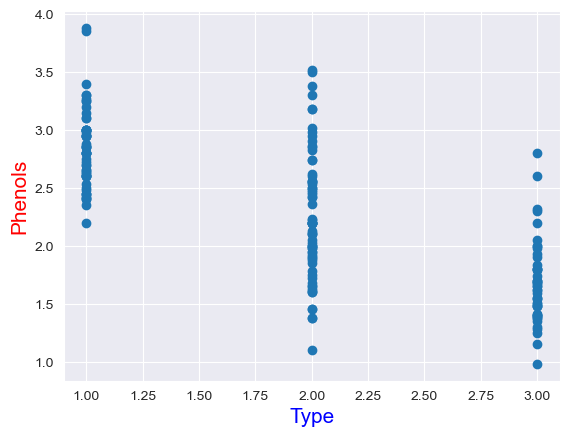

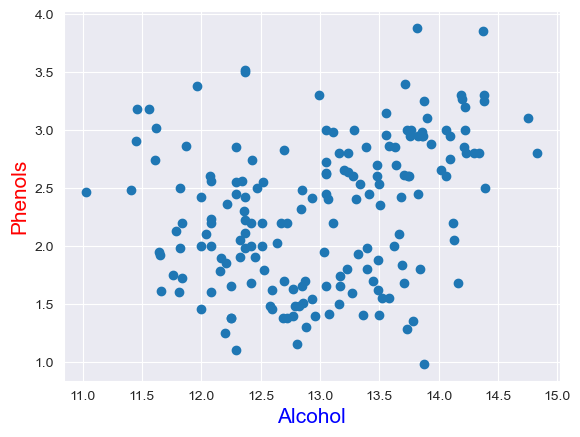

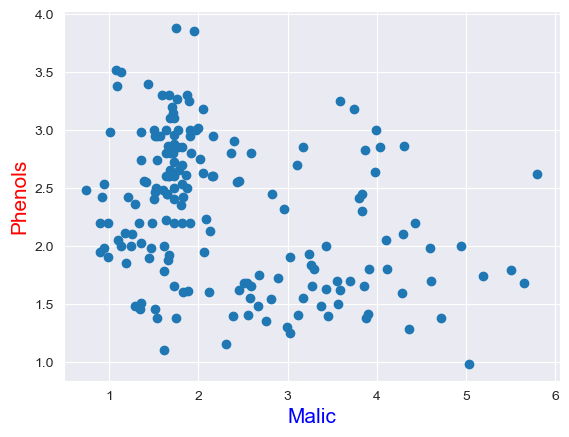

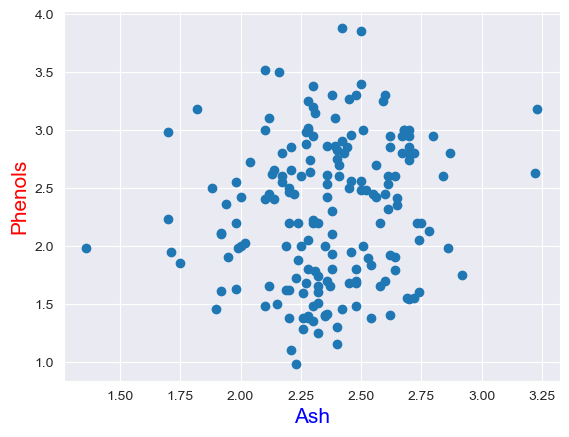

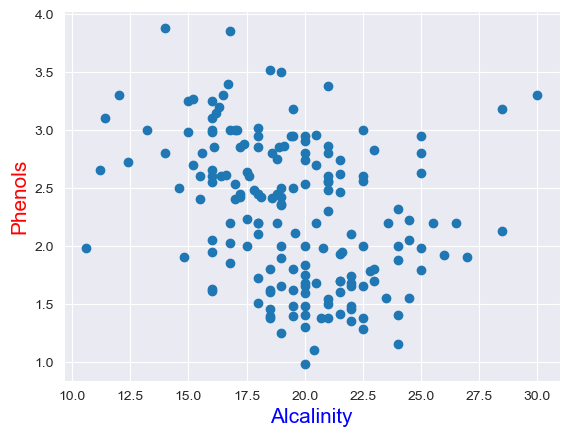

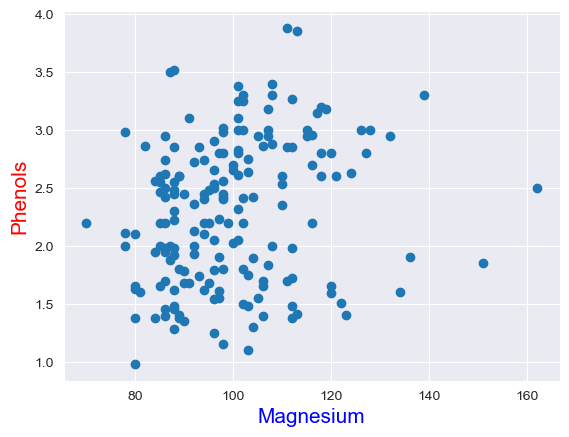

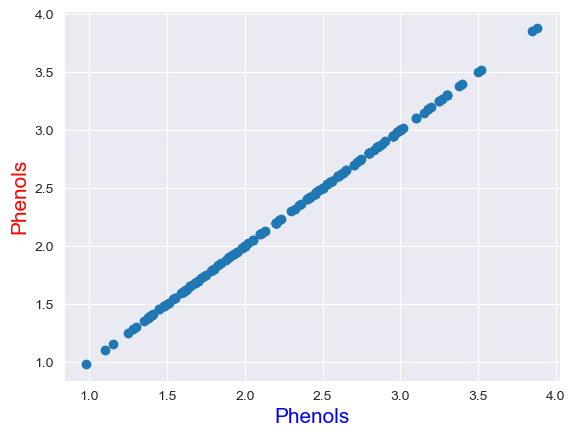

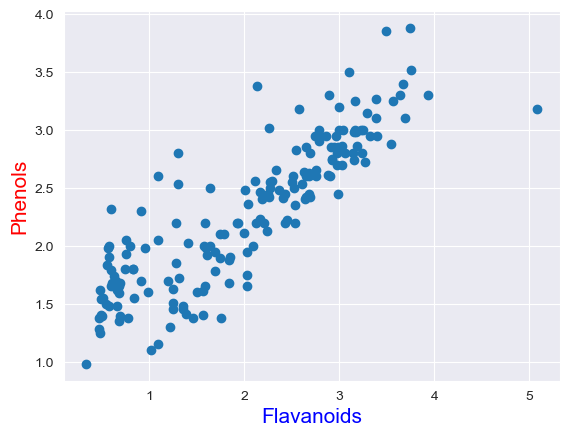

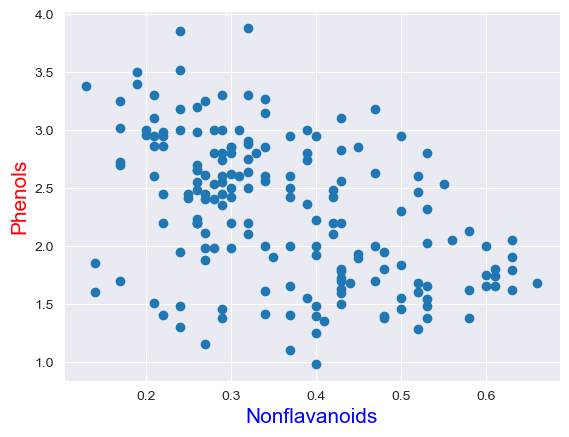

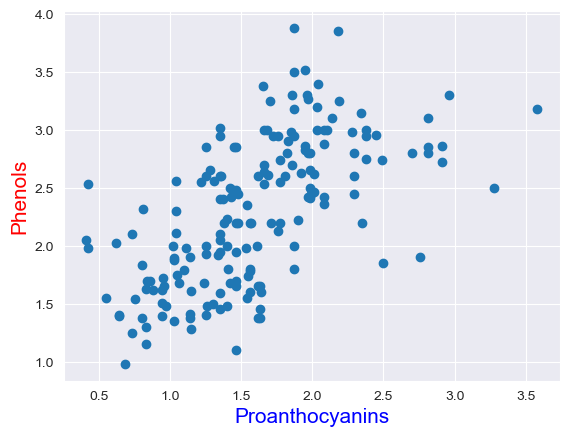

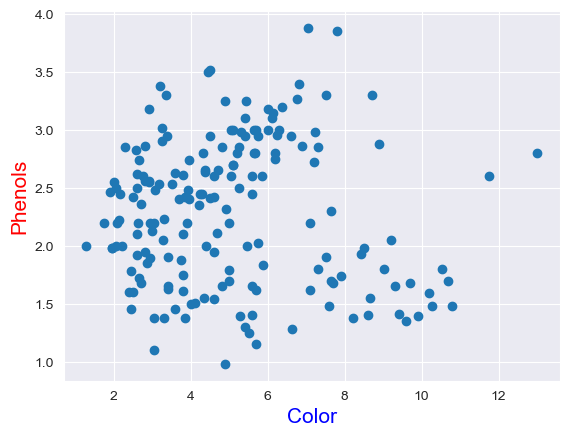

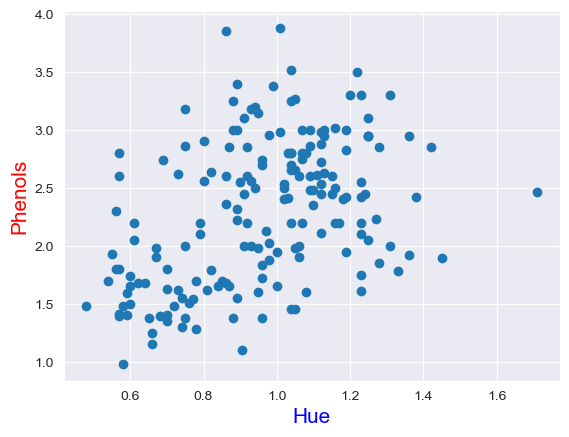

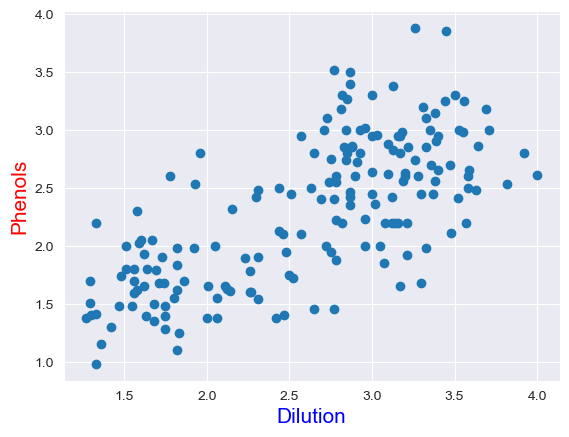

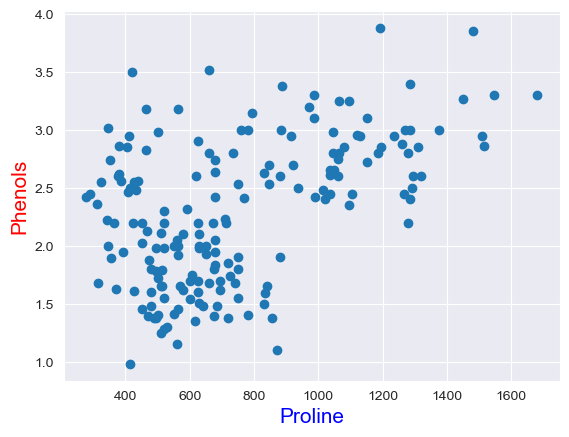

In [129]:
import matplotlib.pyplot as plt
df1=df.select_dtypes([np.int,np.float])
for i,col in enumerate(df1.columns):
    plt.figure(i)
    plt.scatter(col,"Phenols",data=df)
    plt.ylabel("Phenols",color="red",size=15)
    plt.xlabel(col,color="blue",size=15)


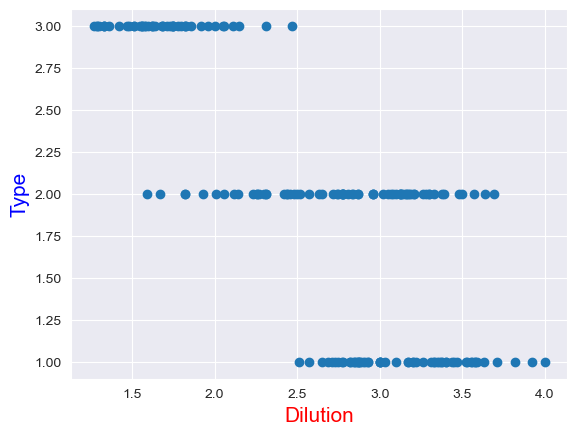

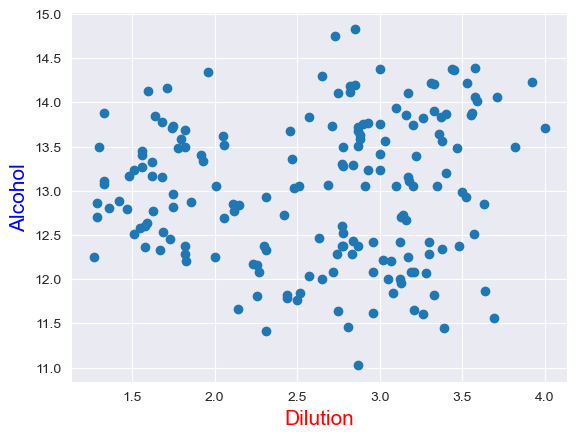

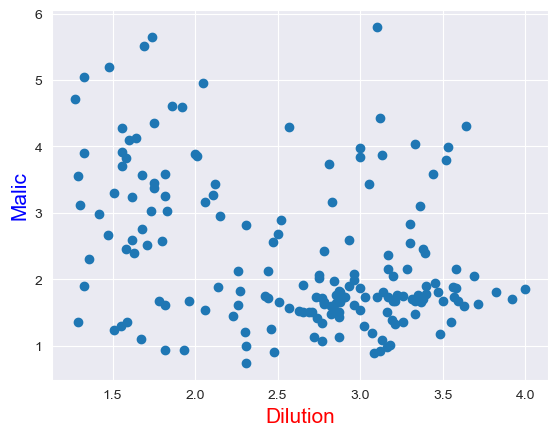

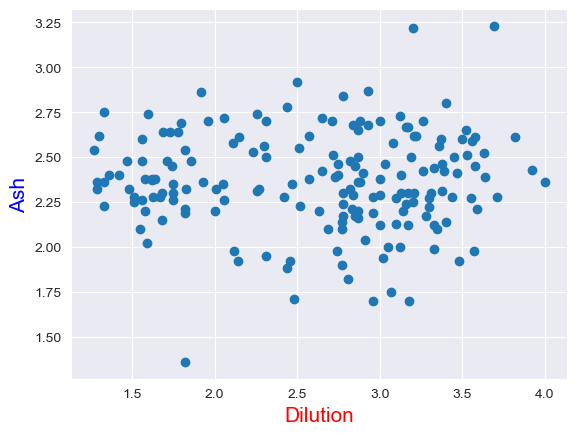

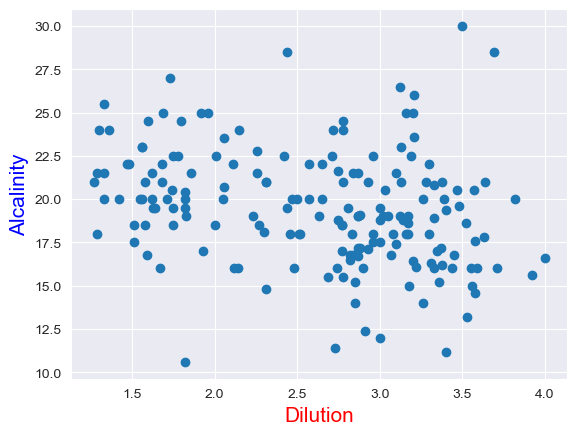

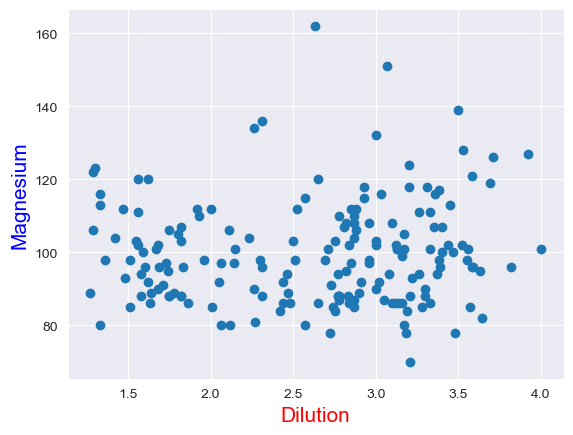

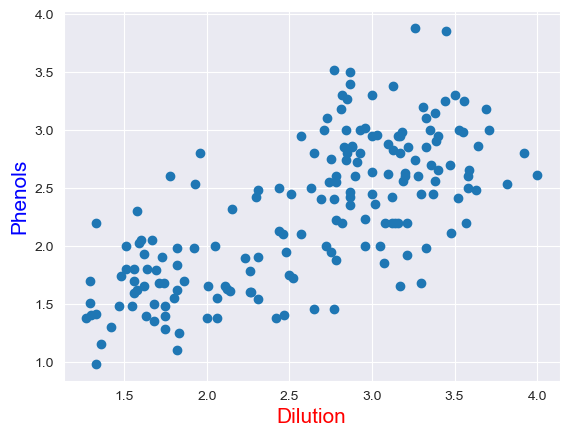

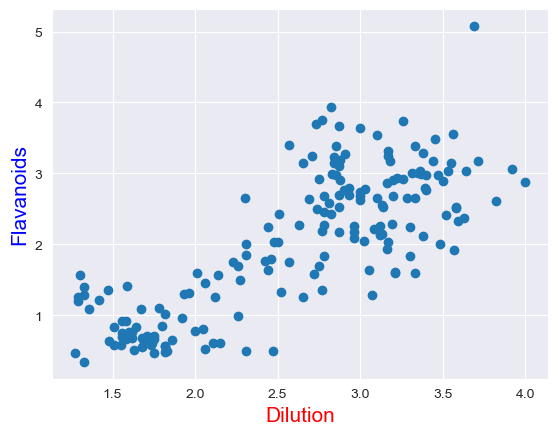

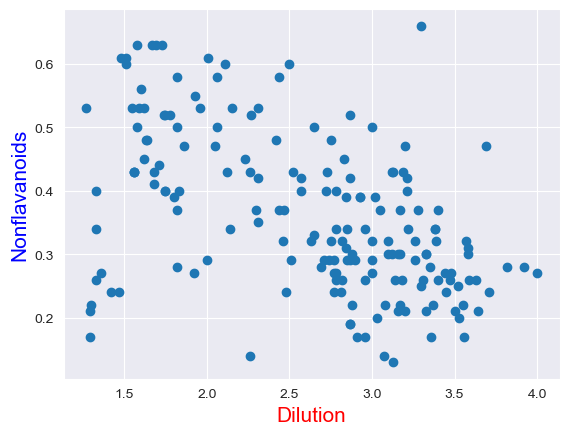

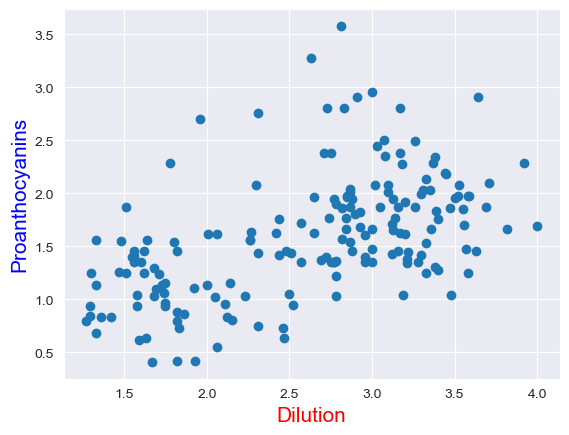

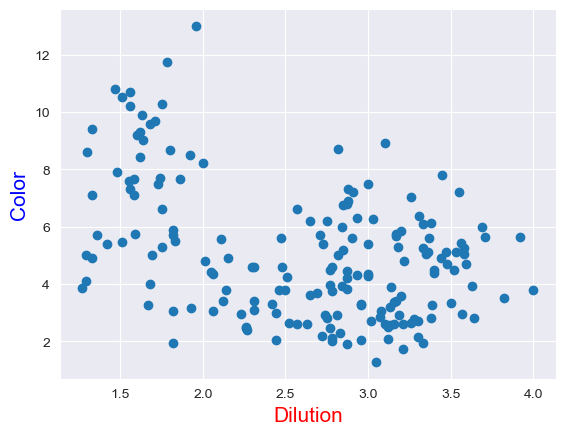

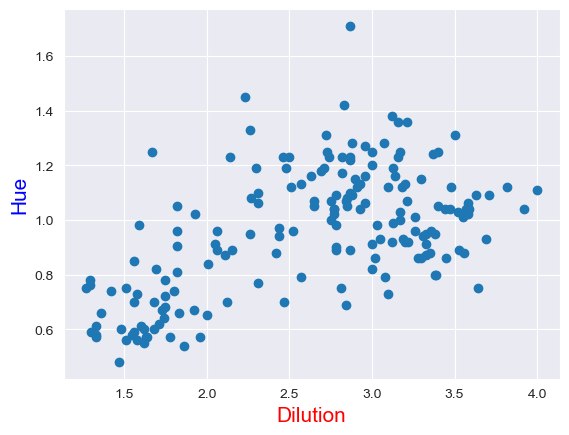

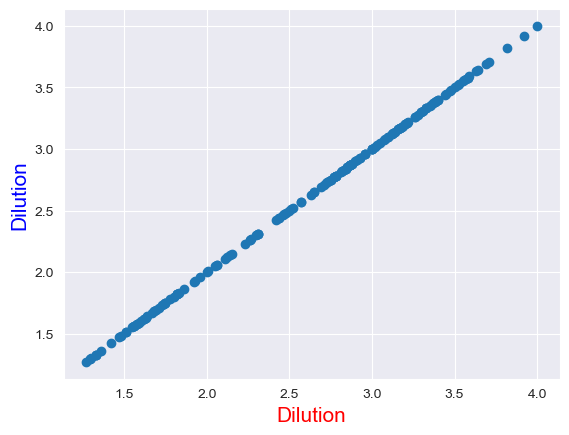

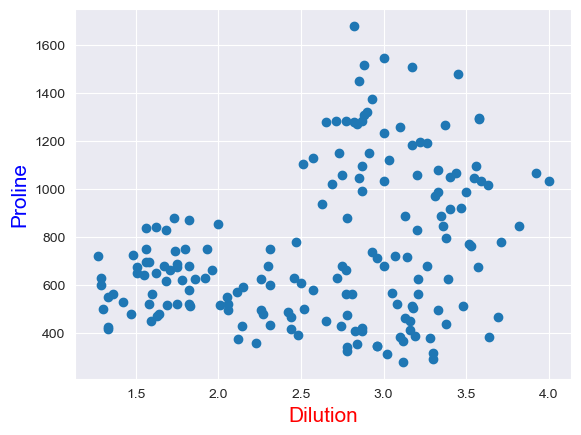

In [130]:
    
for i,col in enumerate(df1.columns):
    plt.figure(i)
    plt.scatter("Dilution",col,data=df)
    plt.xlabel("Dilution",color="red",size=15)
    plt.ylabel(col,color="blue",size=15)    

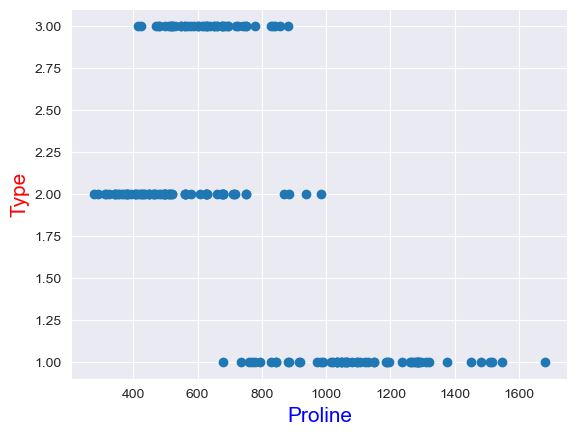

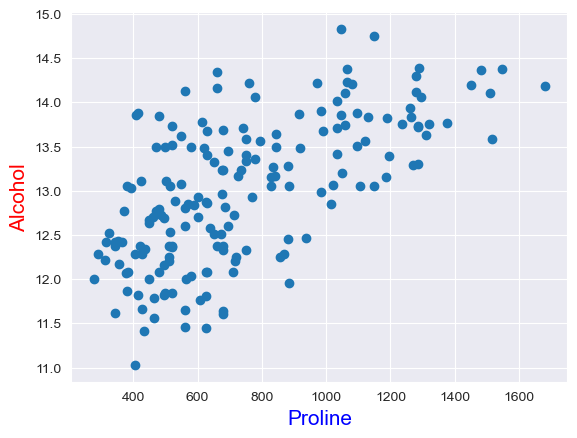

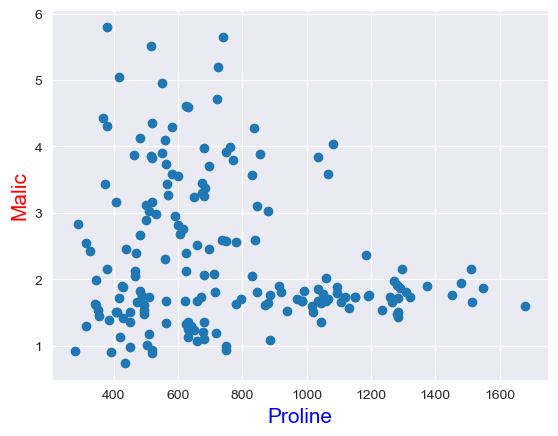

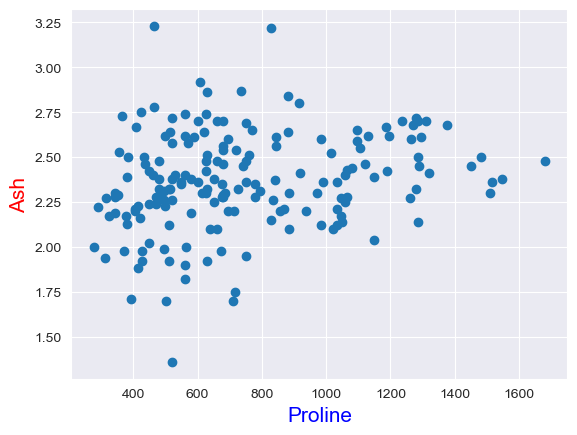

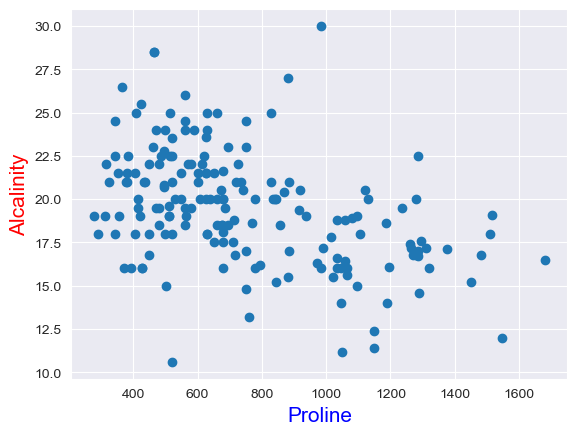

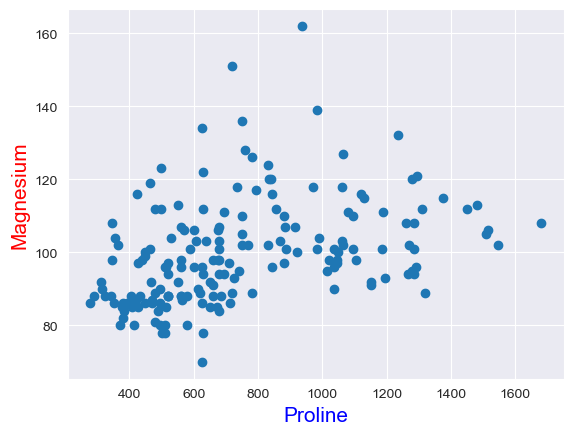

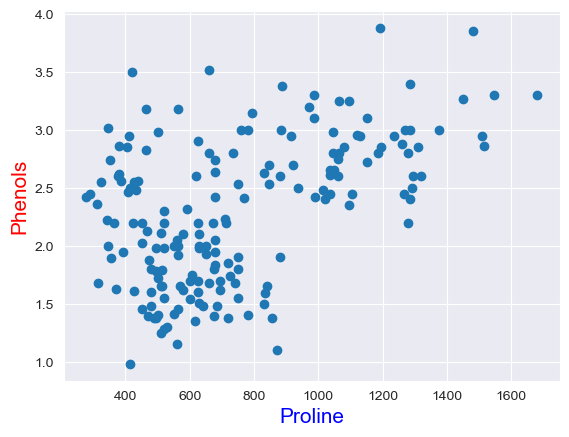

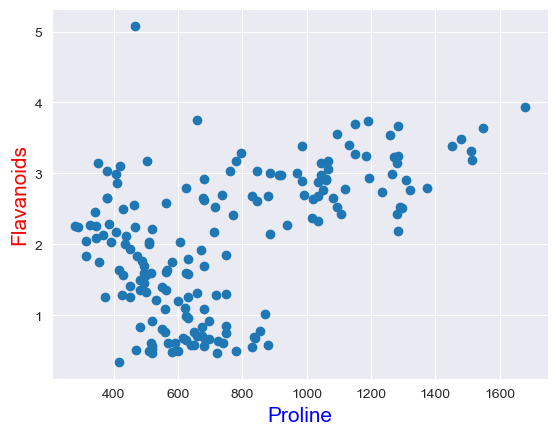

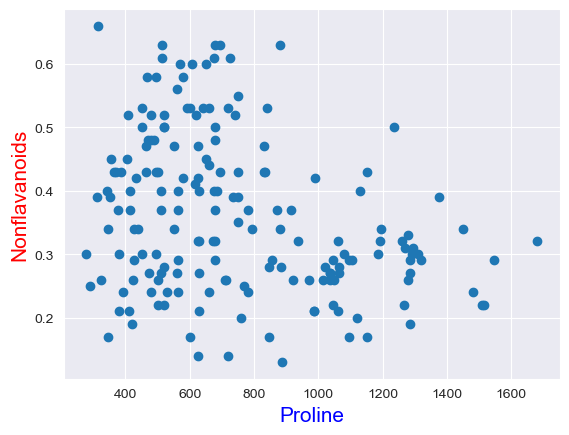

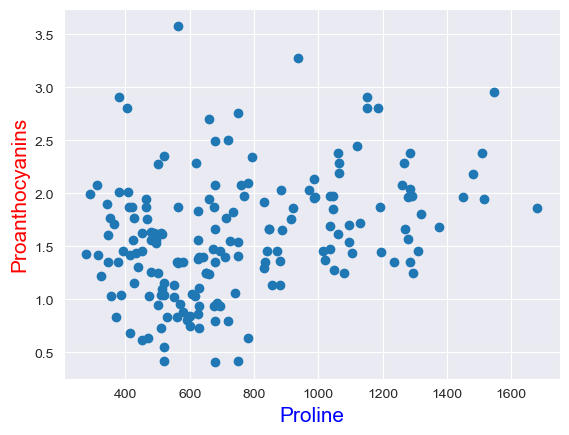

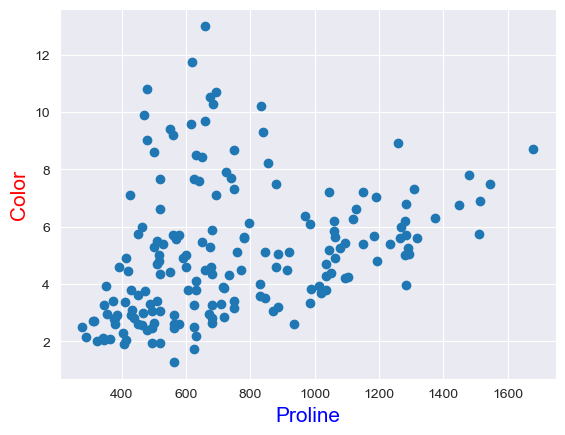

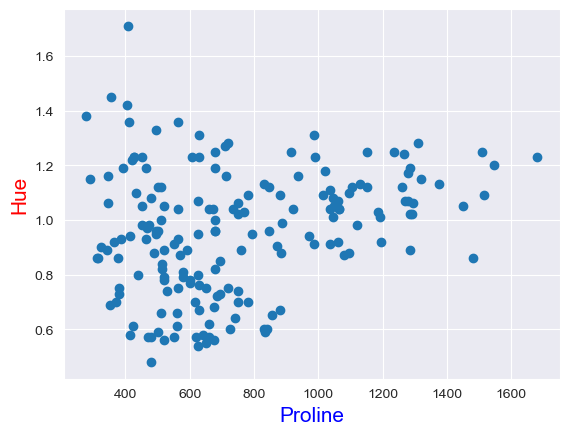

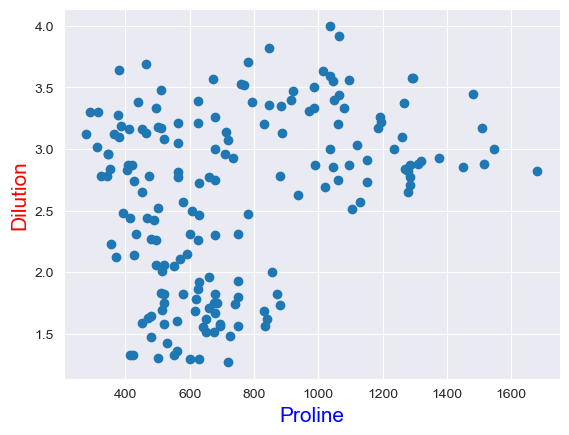

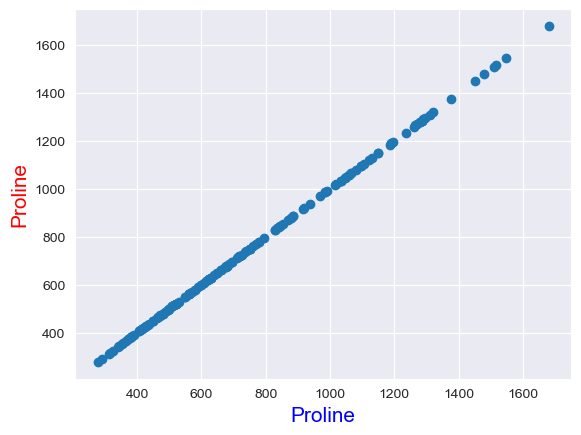

In [131]:
for i,col in enumerate(df1.columns):
    plt.figure(i)
    plt.scatter("Proline",col,data=df)
    plt.ylabel(col,color="red",size=15)
    plt.xlabel("Proline",color="blue",size=15)    

In [132]:
#HIstogram skewness kurtosis
from scipy.stats import skew
from scipy.stats import kurtosis

skewness of Type is 0.1065236775609526
kurtosis of Type is -1.319440380142014
skewness of Alcohol is -0.05104747165391963
kurtosis of Alcohol is -0.8622600987701743
skewness of Malic is 1.0308694978039965
kurtosis of Malic is 0.257348285833094
skewness of Ash is -0.1752067779256028
kurtosis of Ash is 1.0785761323125502
skewness of Alcalinity is 0.21124732832155219
kurtosis of Alcalinity is 0.44082313690028396
skewness of Magnesium is 1.088914887210701
kurtosis of Magnesium is 2.0128060084773907
skewness of Phenols is 0.08590677016719508
kurtosis of Phenols is -0.8458573026752298
skewness of Flavanoids is 0.025129482208428075
kurtosis of Flavanoids is -0.8893650113675178
skewness of Nonflavanoids is 0.44634901064702254
kurtosis of Nonflavanoids is -0.6529522070380387
skewness of Proanthocyanins is 0.5127690334109938
kurtosis of Proanthocyanins is 0.5056710064108252
skewness of Color is 0.8612480547740543
kurtosis of Color is 0.33736975669801694
skewness of Hue is 0.020913119068882775
ku

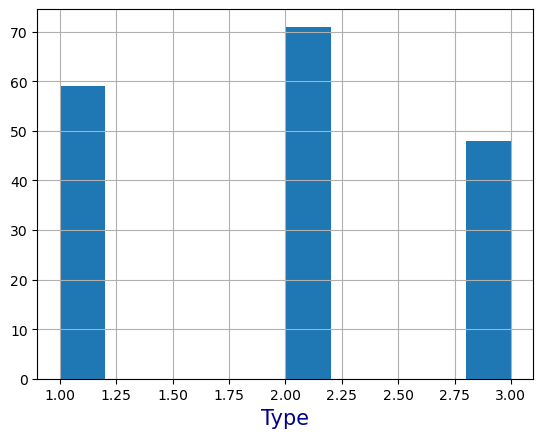

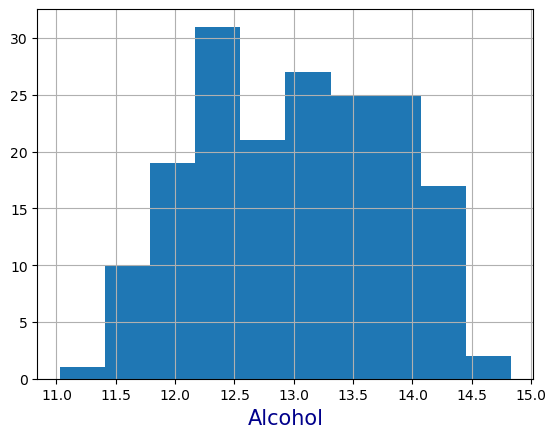

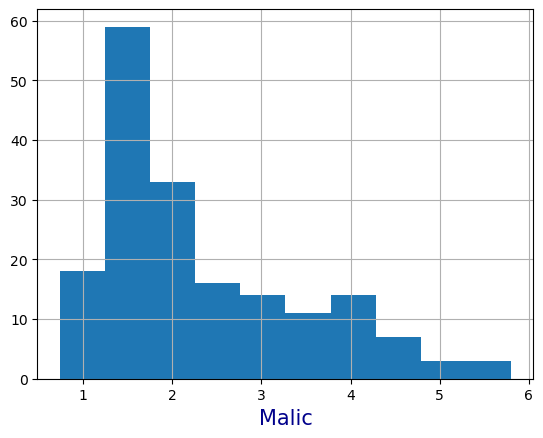

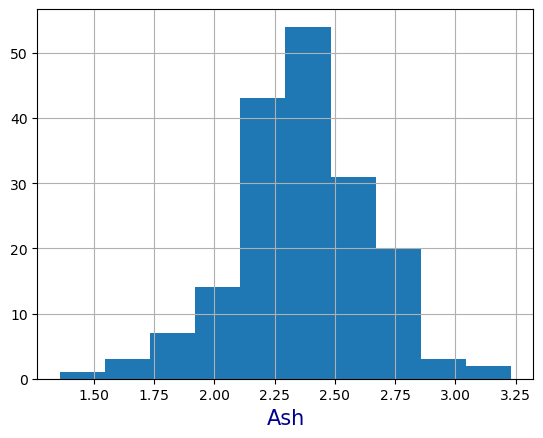

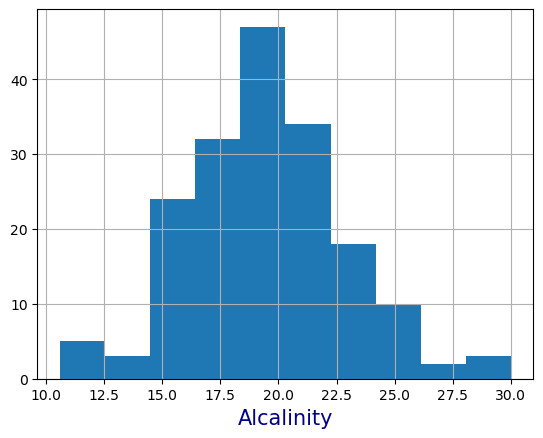

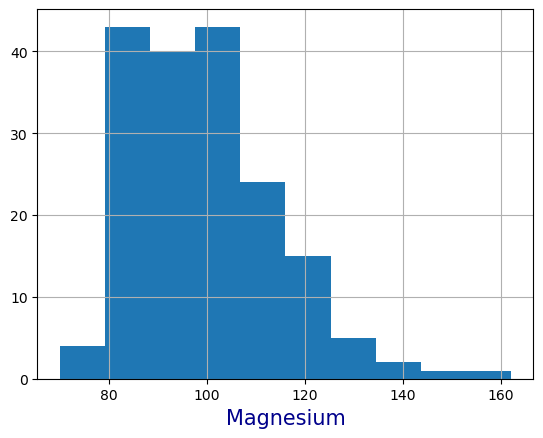

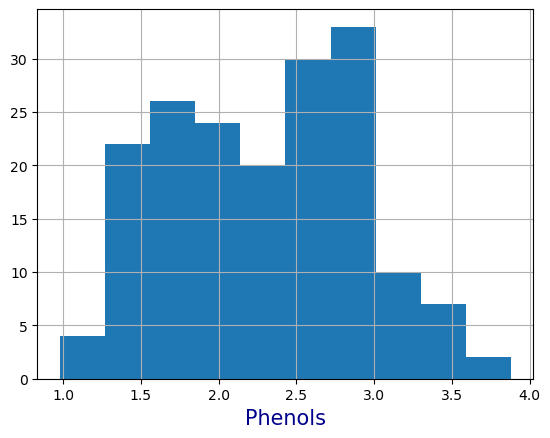

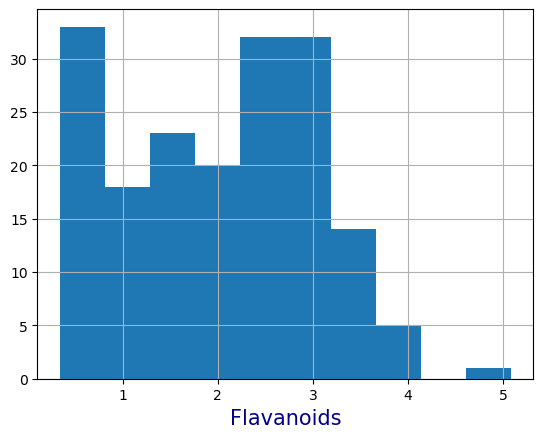

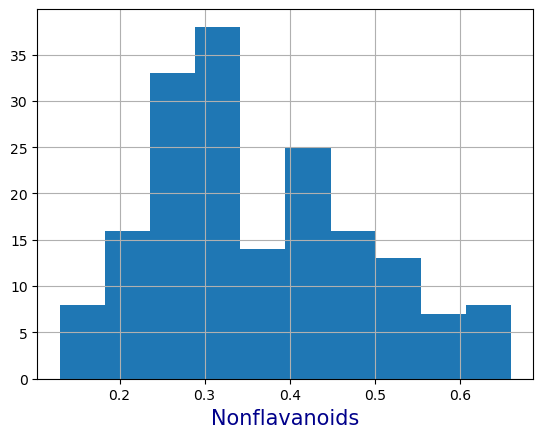

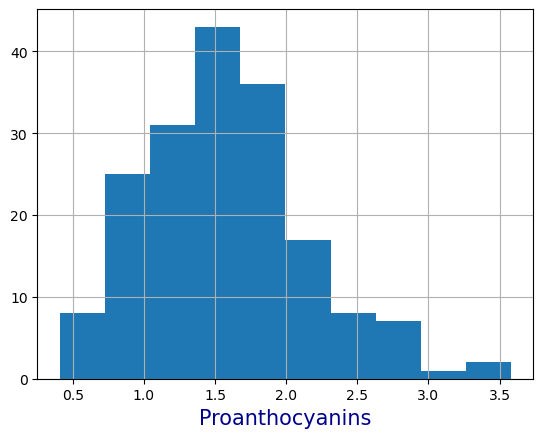

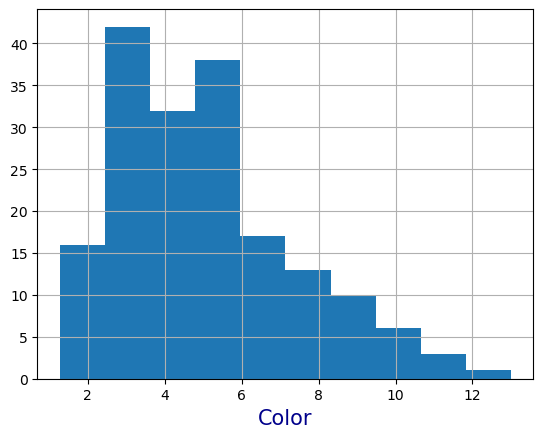

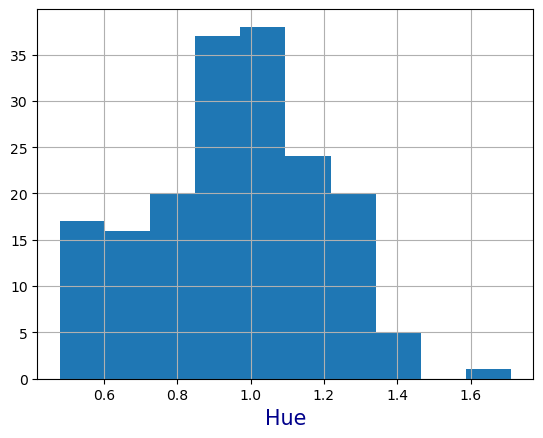

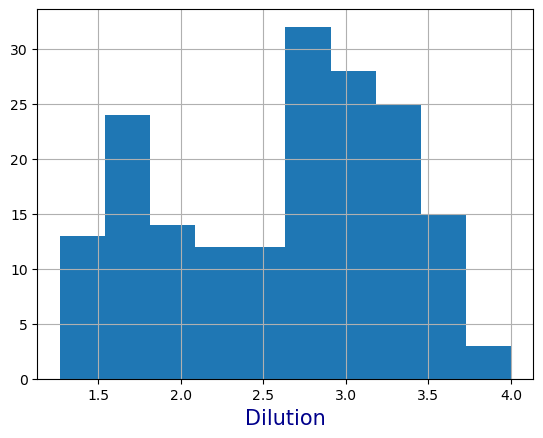

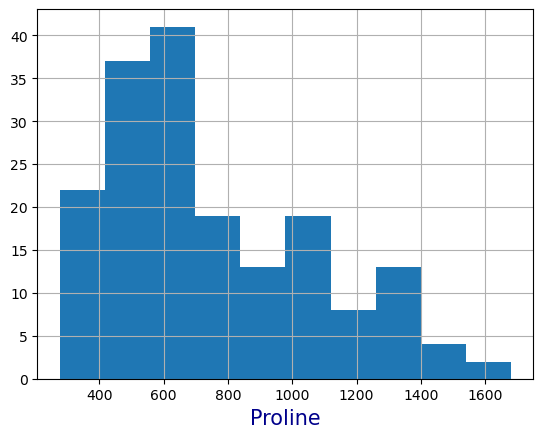

In [18]:
for i,col in enumerate(df1.columns):
    plt.figure(i)
    df[col].hist()
    print("skewness of",col,"is",skew(df[col]))
    print("kurtosis of",col,"is",kurtosis(df[col]))
    plt.xlabel(col,color="darkblue",size=15)

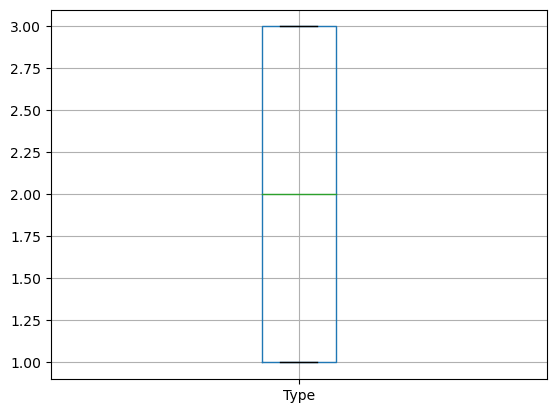

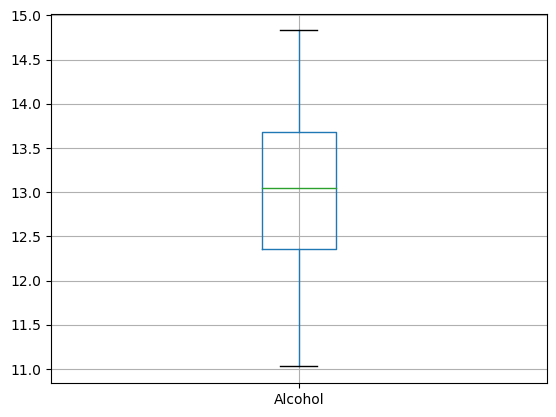

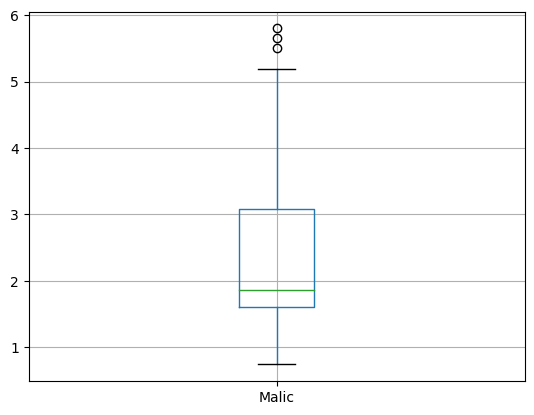

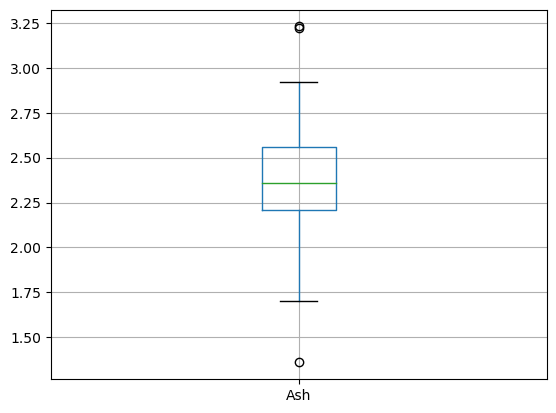

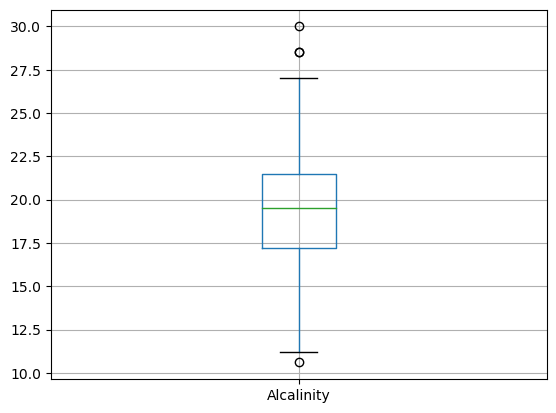

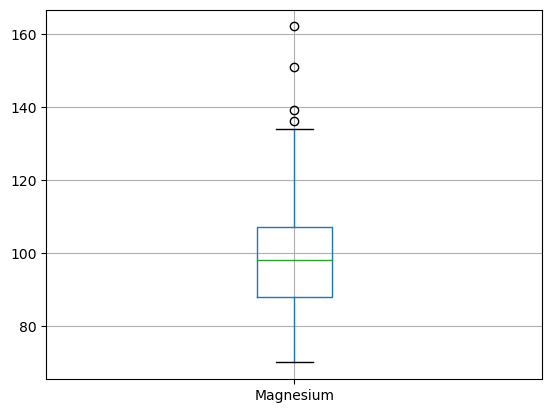

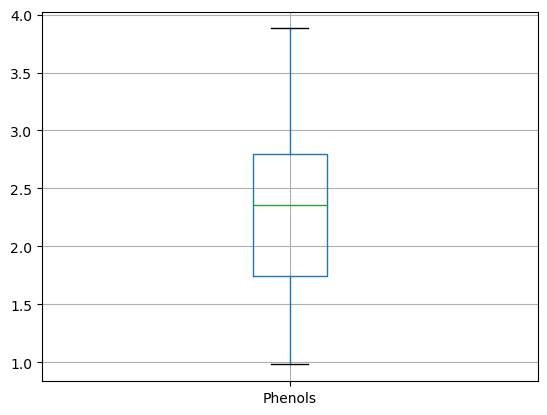

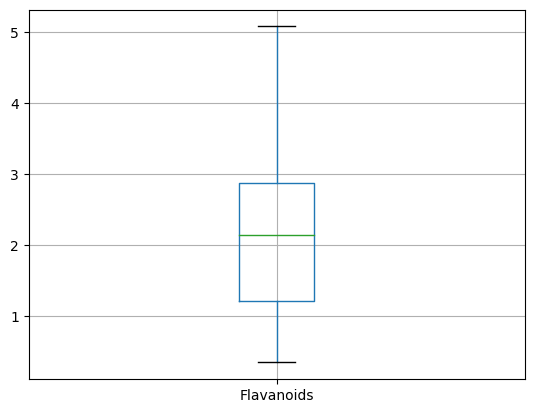

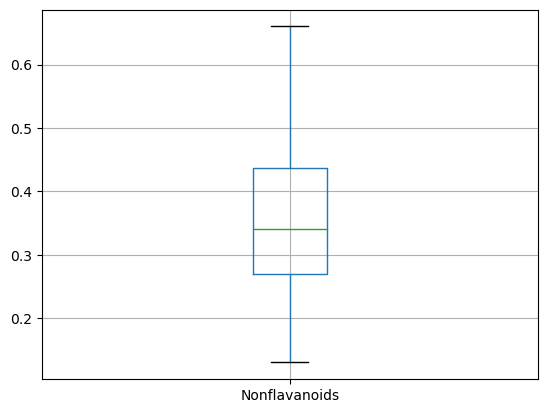

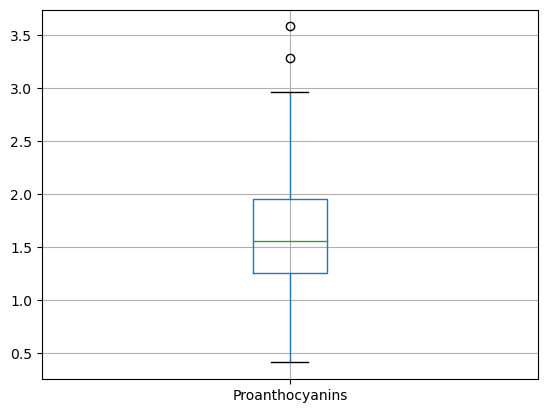

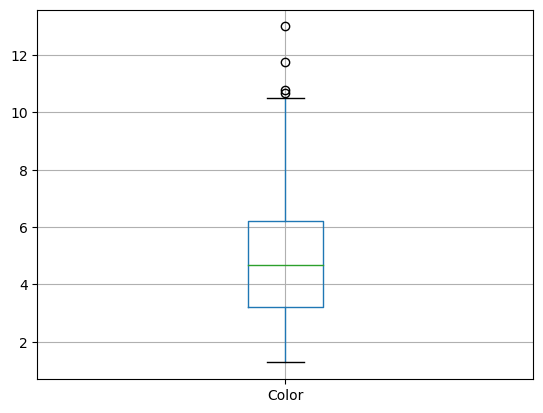

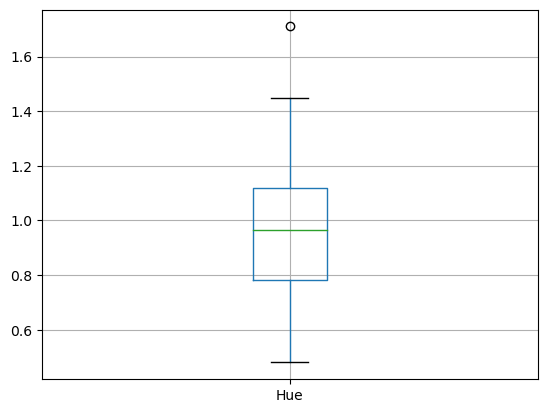

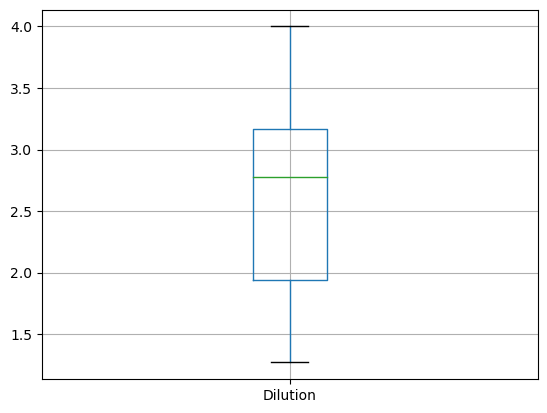

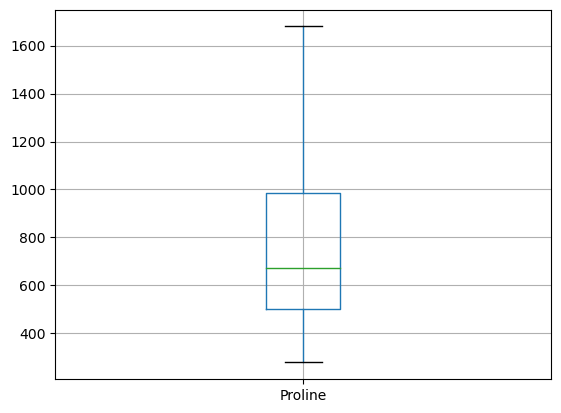

In [19]:
for i,col in enumerate(df1.columns):
    plt.figure(i)
    df.boxplot(col)
    

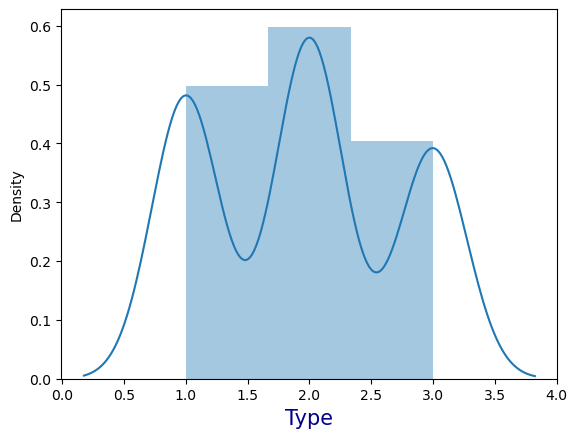

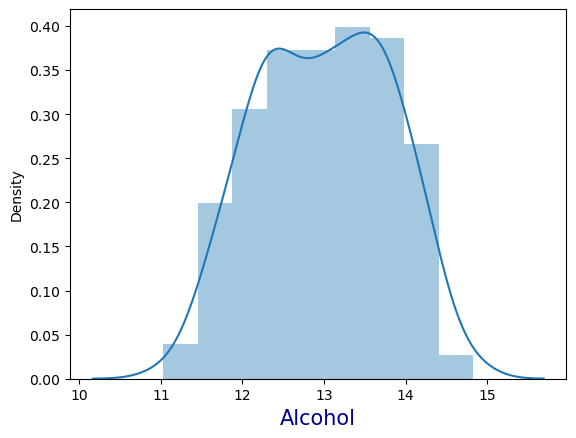

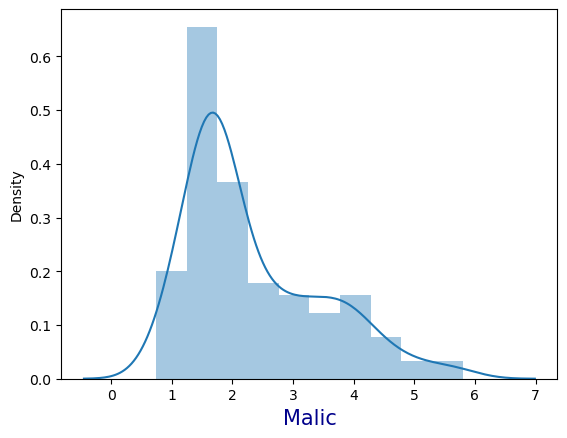

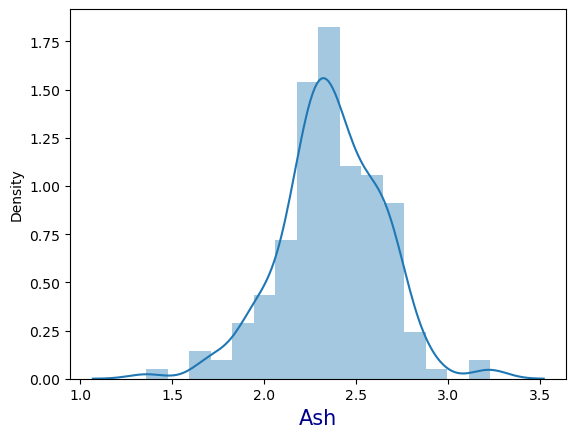

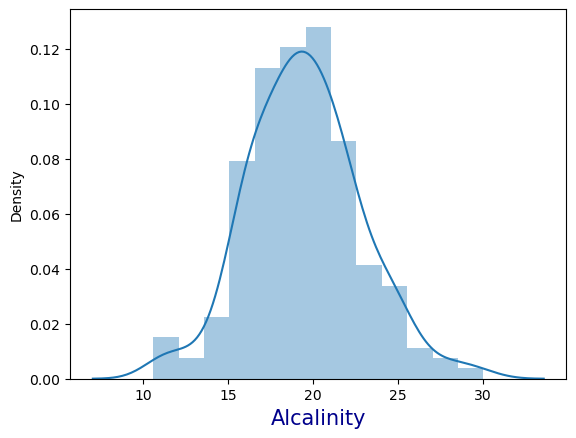

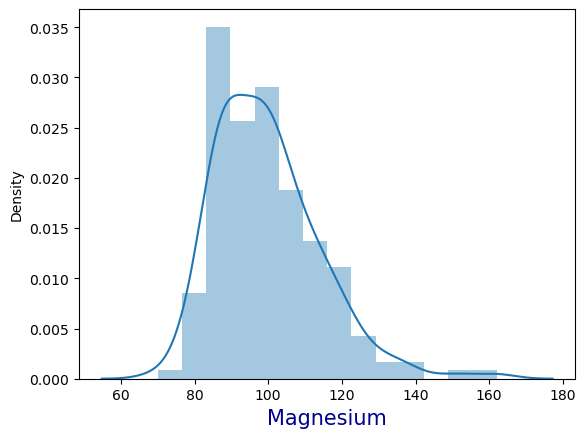

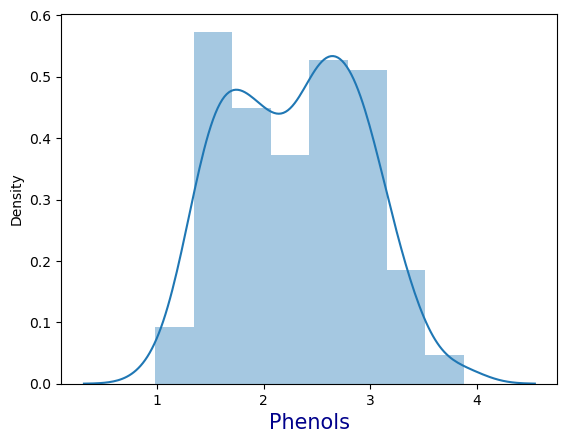

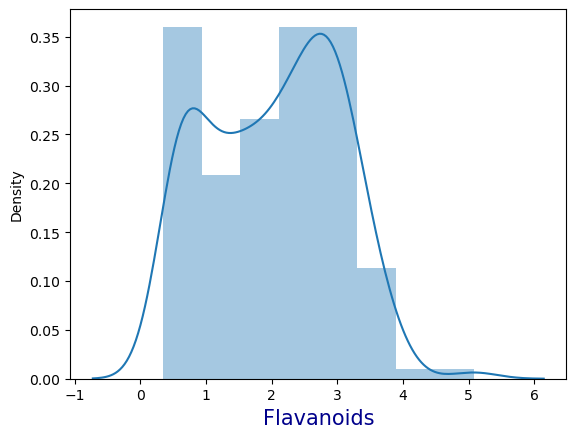

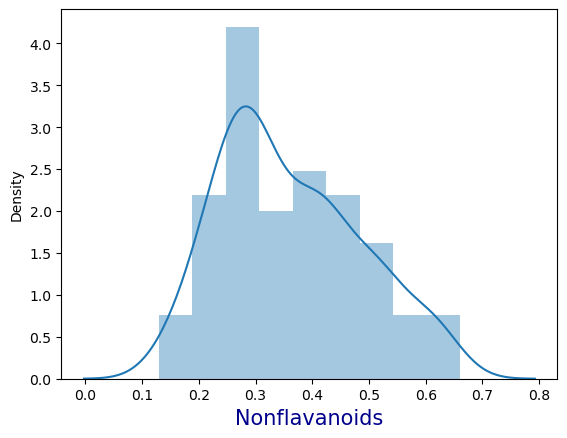

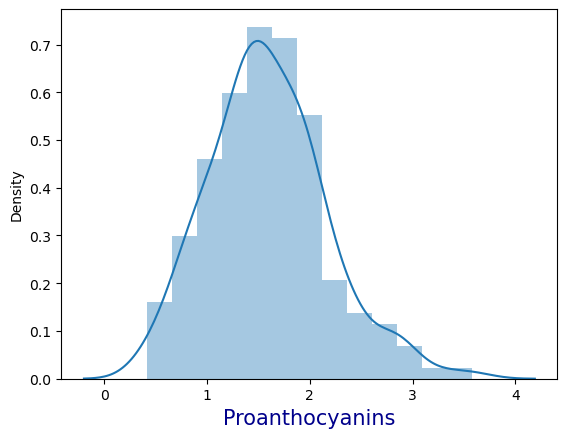

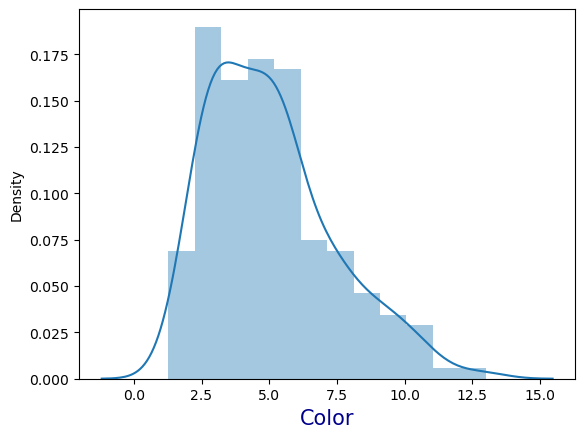

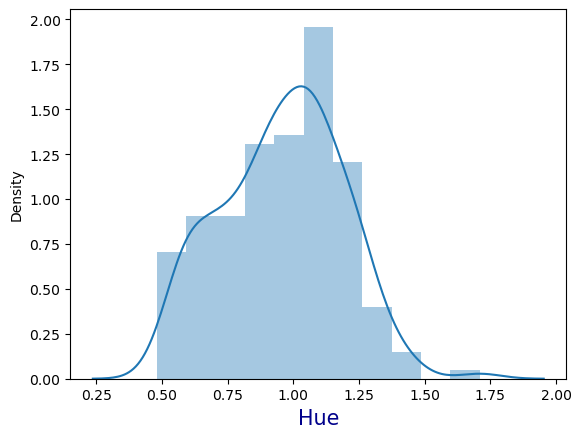

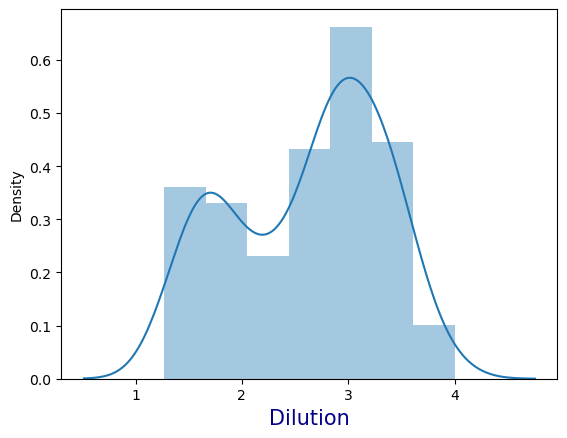

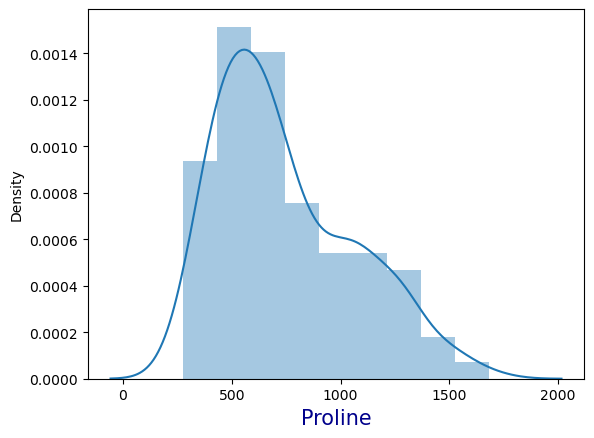

In [20]:
import seaborn as sns
for i,col in enumerate(df1.columns):
    plt.figure(i)
    sns.distplot(df1[col])
    plt.xlabel(col,color="darkblue",size=15)

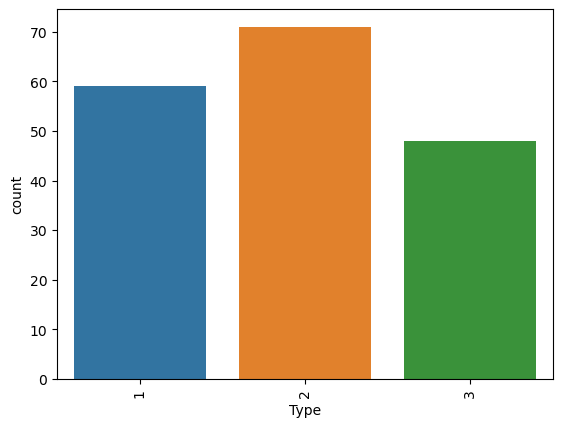

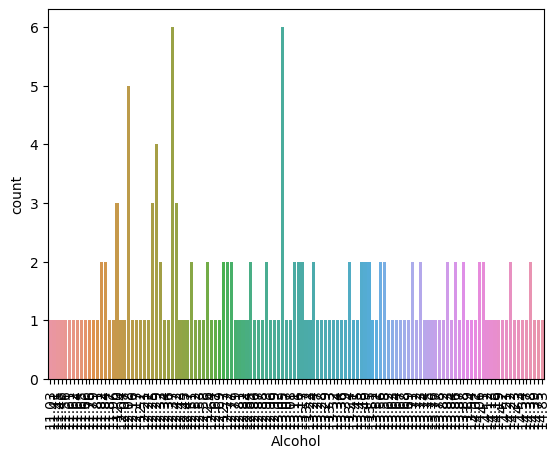

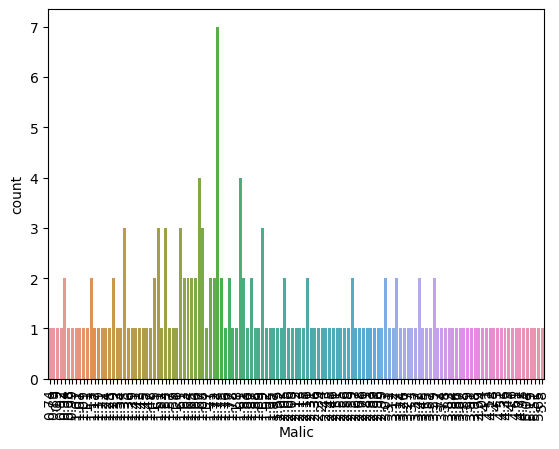

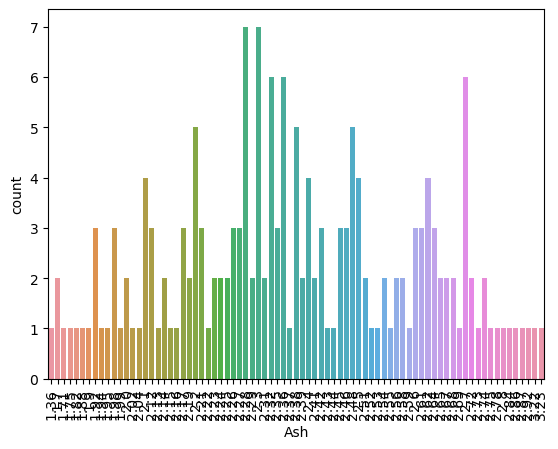

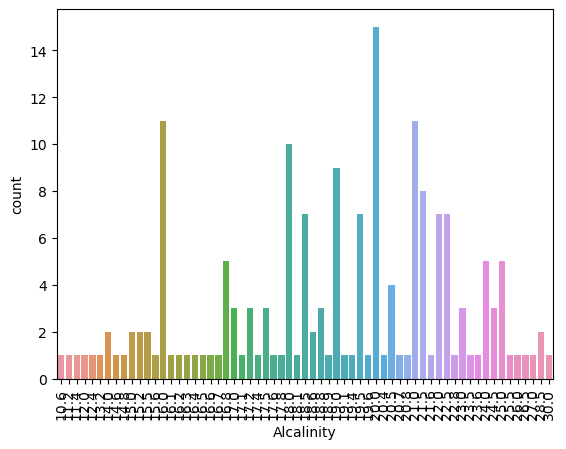

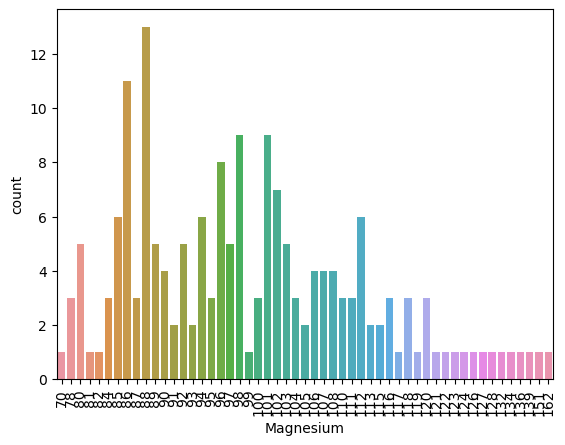

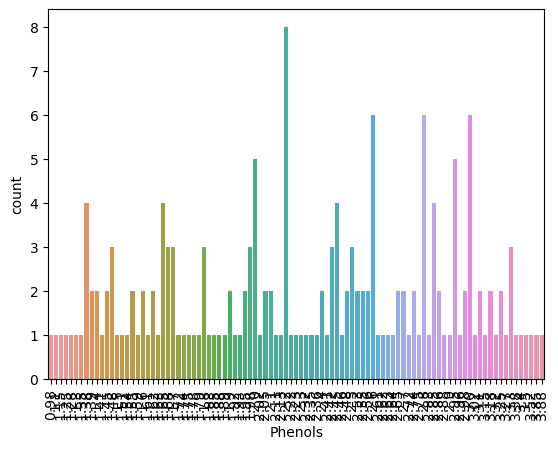

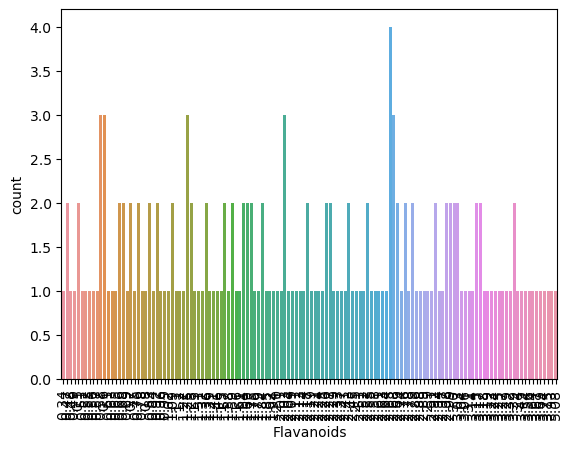

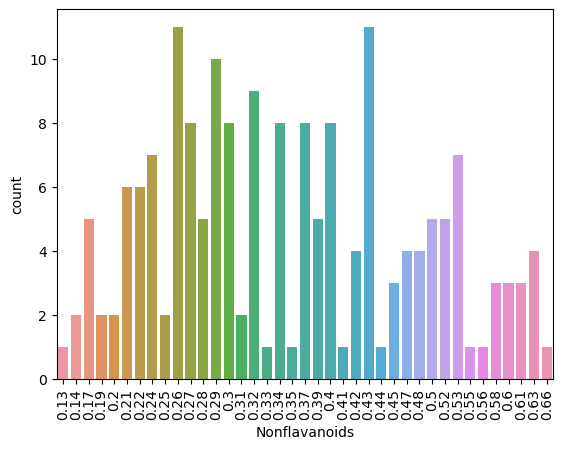

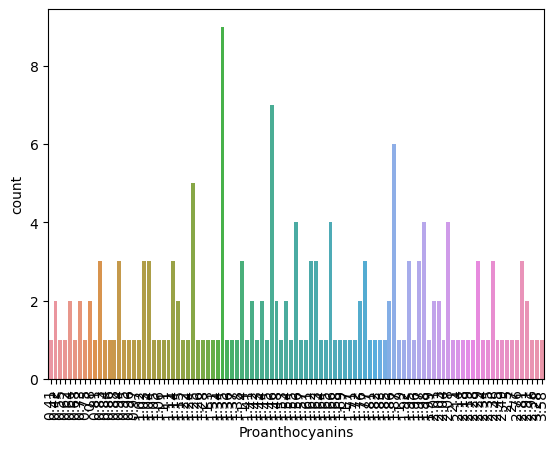

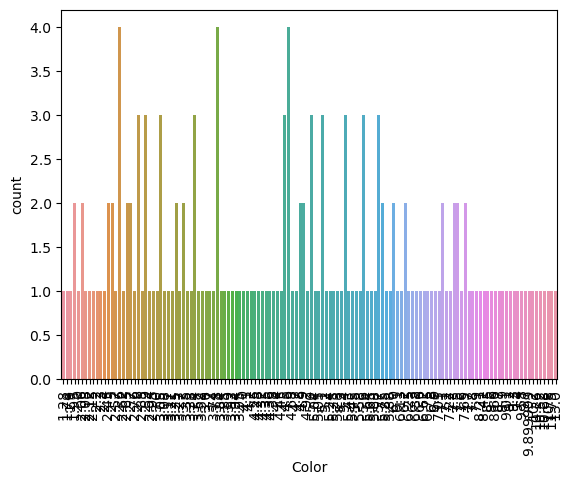

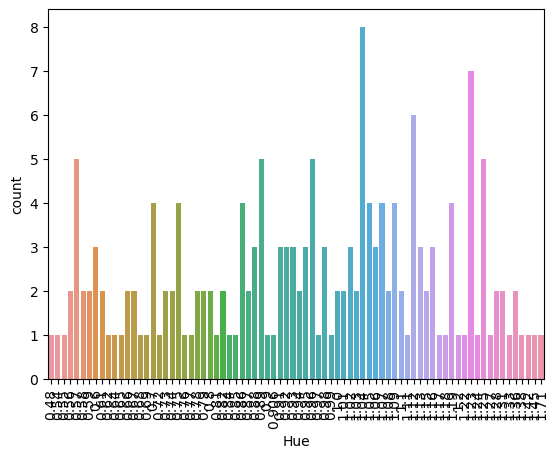

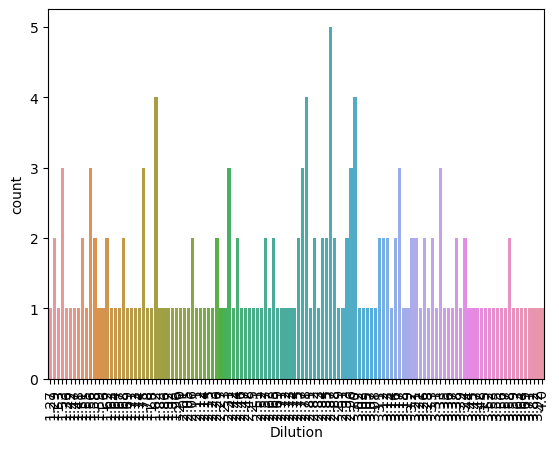

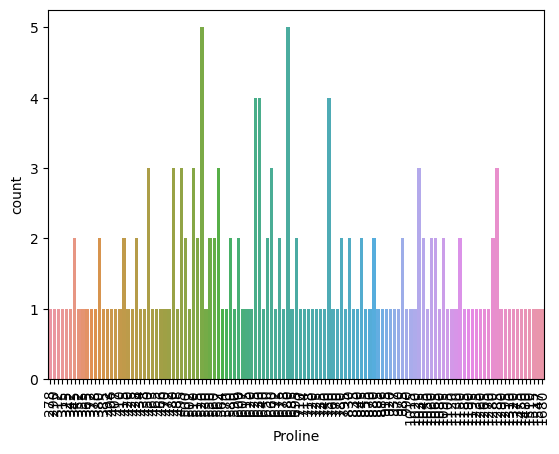

In [21]:
#countplot
import seaborn as sns
for i,col in enumerate(df.columns):
    plt.figure(i)
    
    sns.countplot(x=col,data=df)
    plt.xticks(rotation=90)


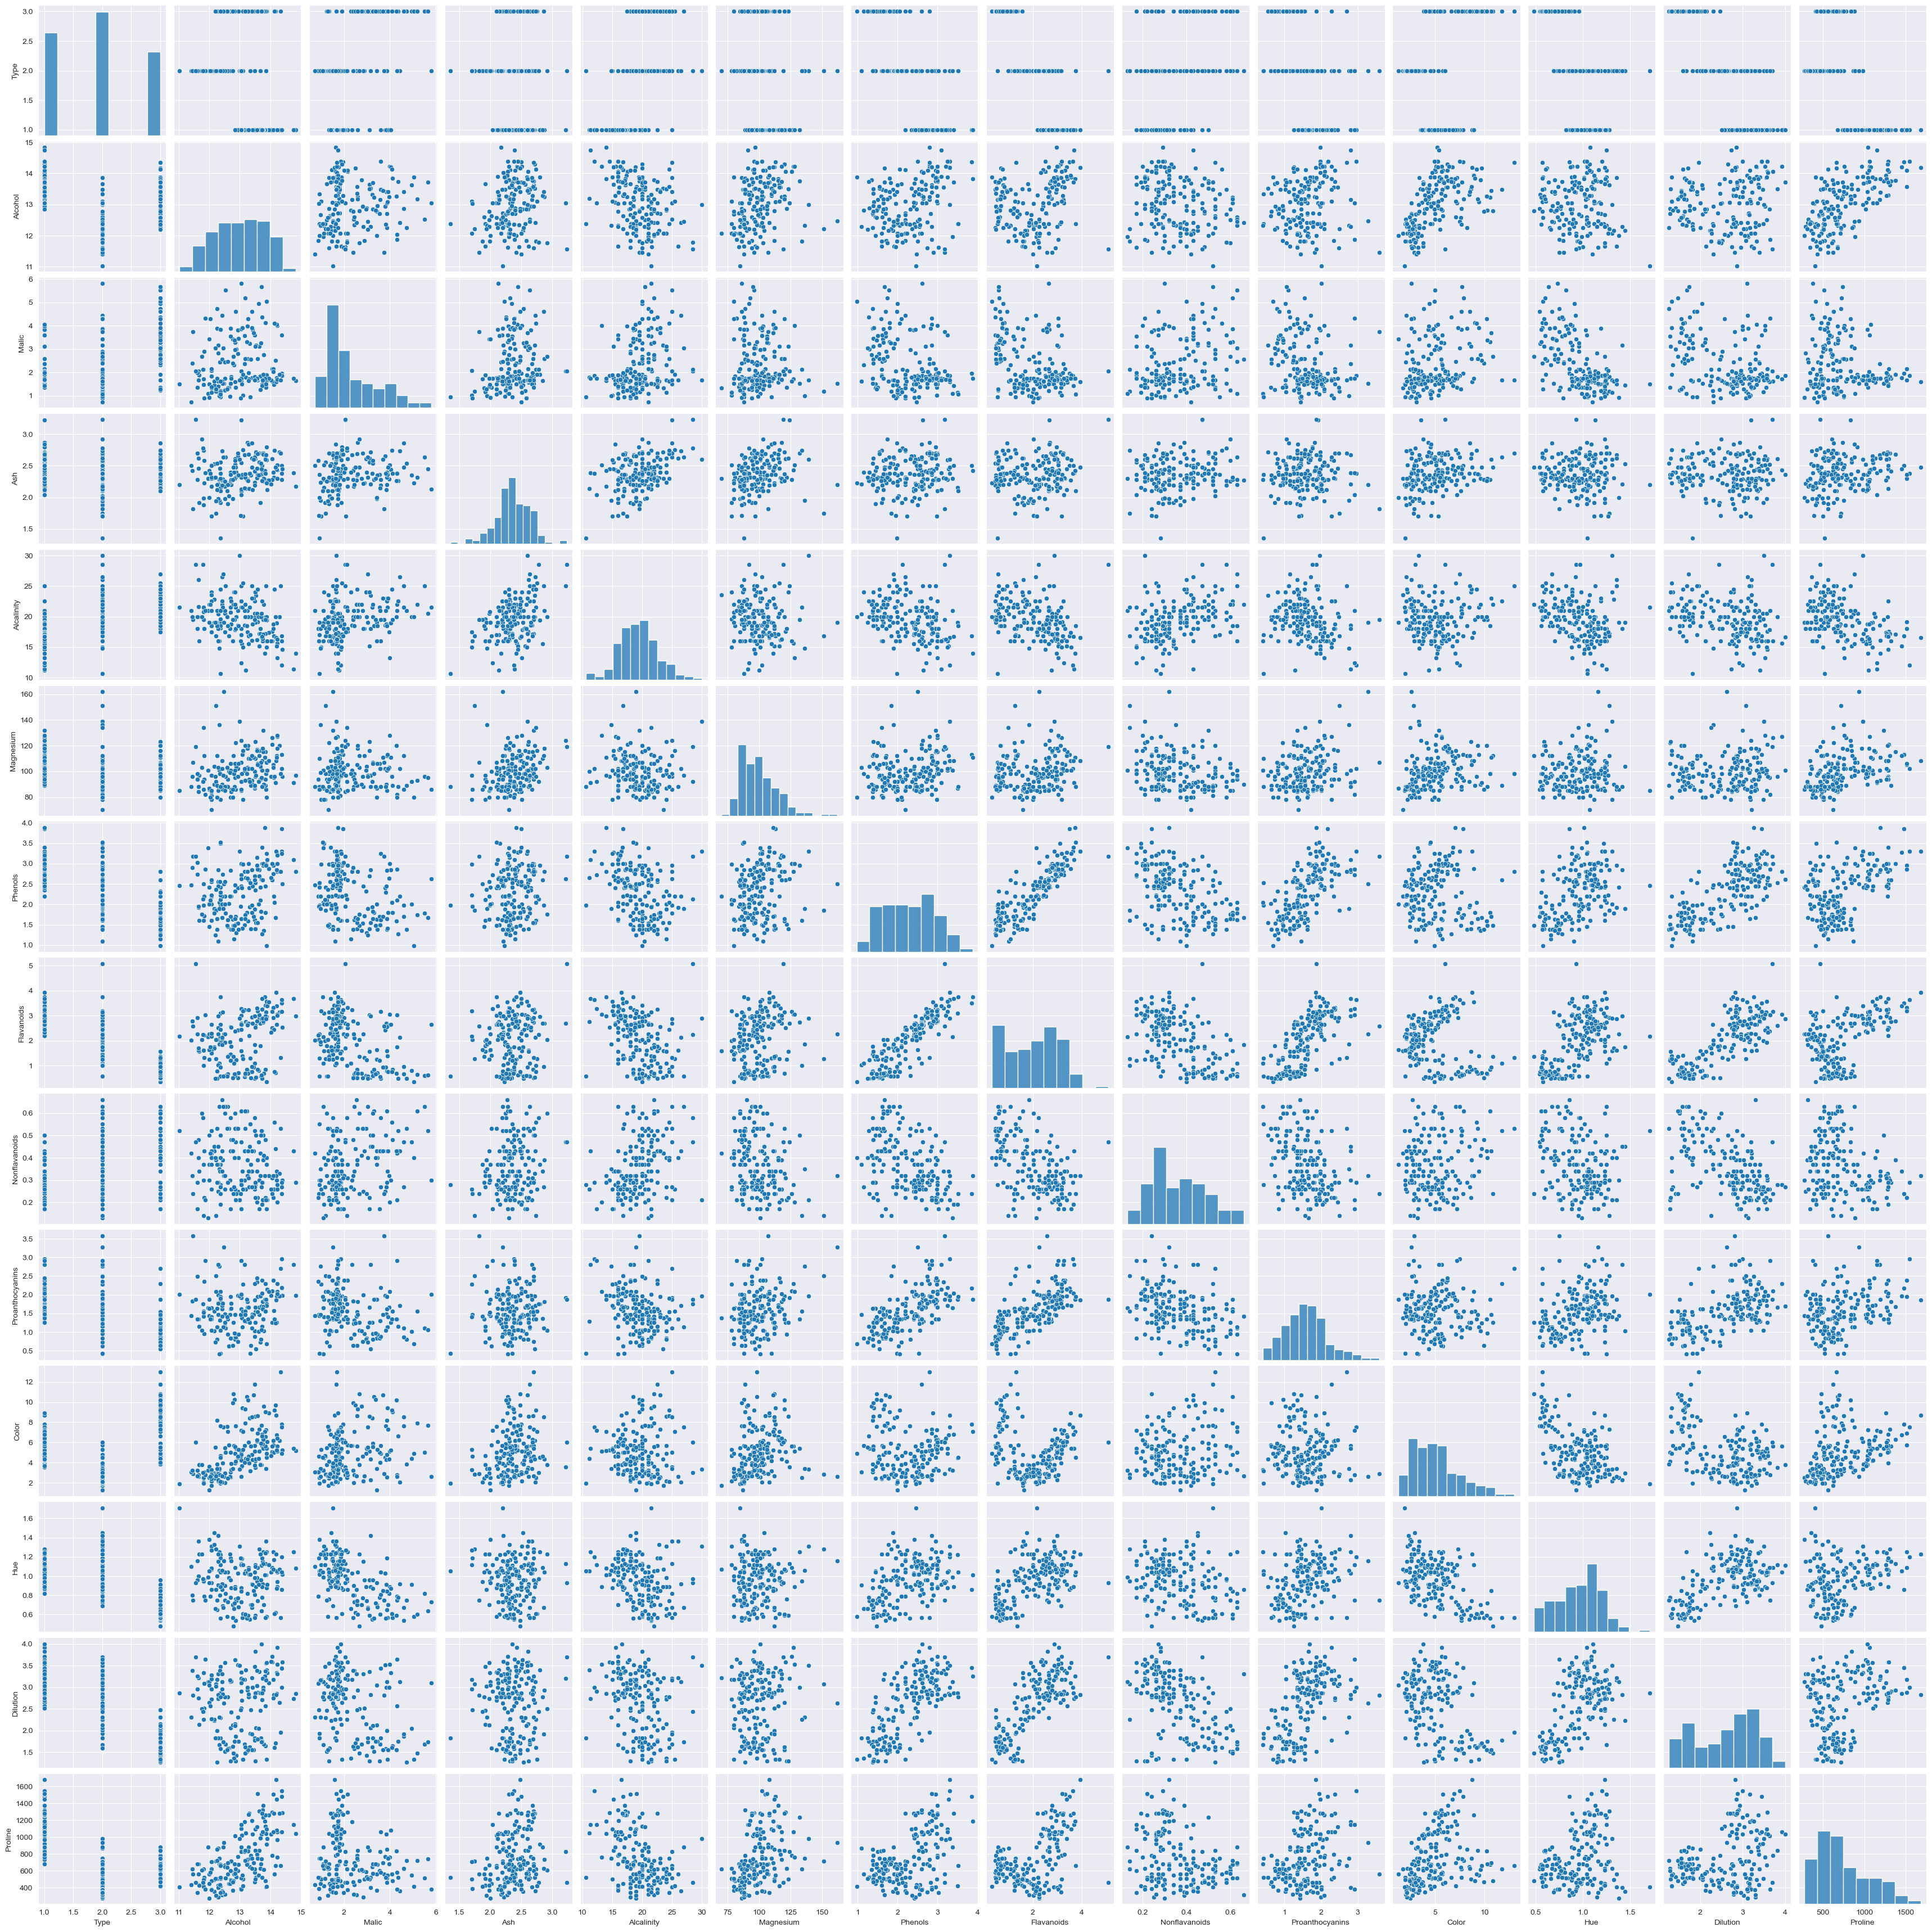

In [22]:
#pairplot
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df)

<AxesSubplot:>

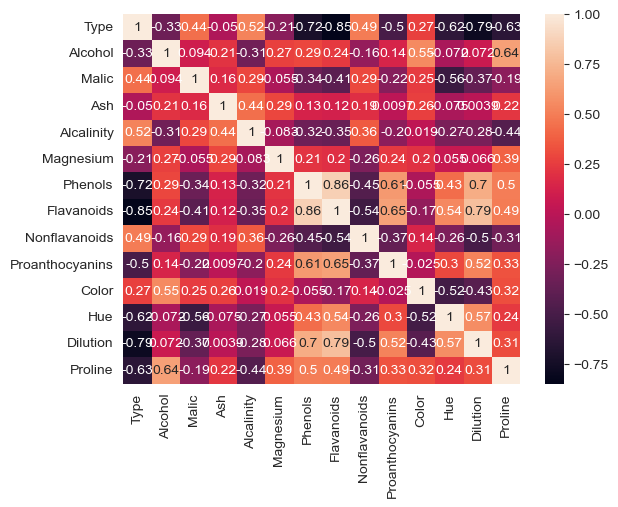

In [23]:
import seaborn as sn
sn.heatmap(df.corr(),annot=True)

In [133]:
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [134]:
X=df.iloc[:,1:]
X

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 13 columns]

In [135]:

import scipy.cluster.hierarchy as shc



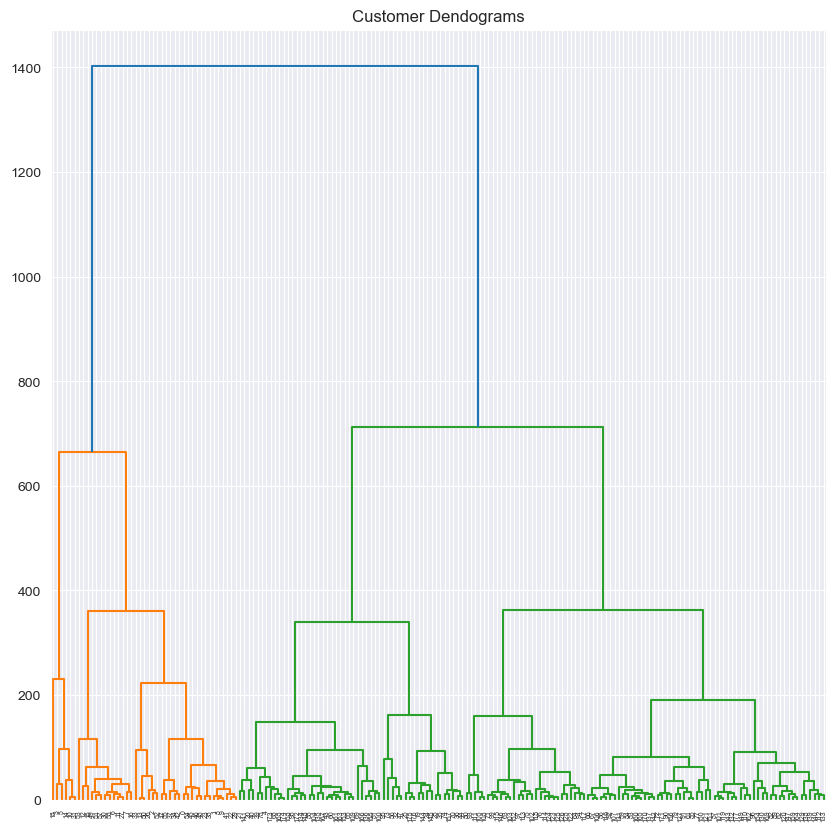

In [27]:
plt.figure(figsize=(10, 10))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(X, method='complete')) 


In [136]:
# forming grouping of clusters
from sklearn.cluster import AgglomerativeClustering
aggc=AgglomerativeClustering(affinity="euclidean",linkage="complete")
aggc

AgglomerativeClustering(linkage='complete')

In [137]:
Y=aggc.fit(X)
Y=aggc.fit_predict(X)

In [138]:
Y=pd.DataFrame(Y)


In [139]:
Y

0
0    1
1    1
2    1
3    1
4    0
..  ..
173  0
174  0
175  0
176  0
177  0

[178 rows x 1 columns]

In [140]:
Y[0].value_counts()

0    135
1     43
Name: 0, dtype: int64

In [141]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [142]:
X

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 13 columns]

<Figure size 1000x2000 with 0 Axes>

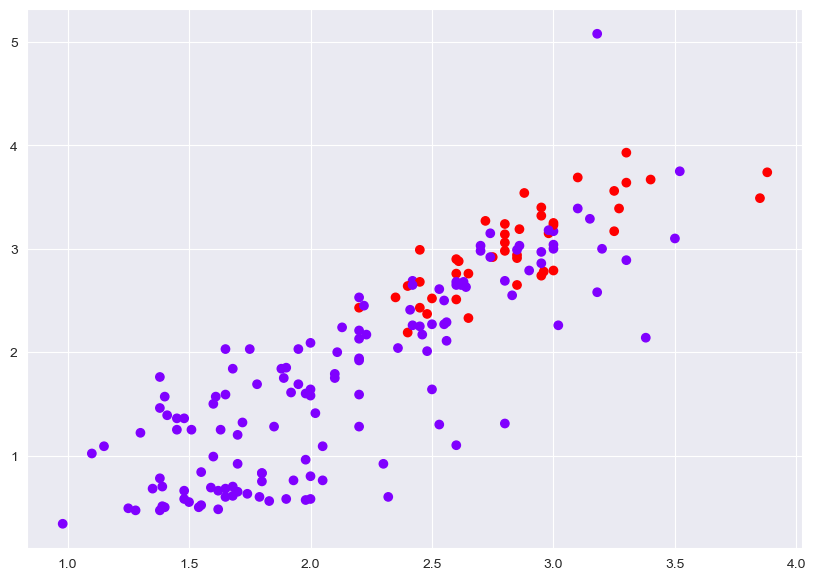

In [143]:
plt.figure(figsize=(10,20))
plt.figure(figsize=(10, 7))  
plt.scatter(X.iloc[:,5], X.iloc[:,6], c=aggc.labels_, cmap='rainbow')  

<Figure size 1000x2000 with 0 Axes>

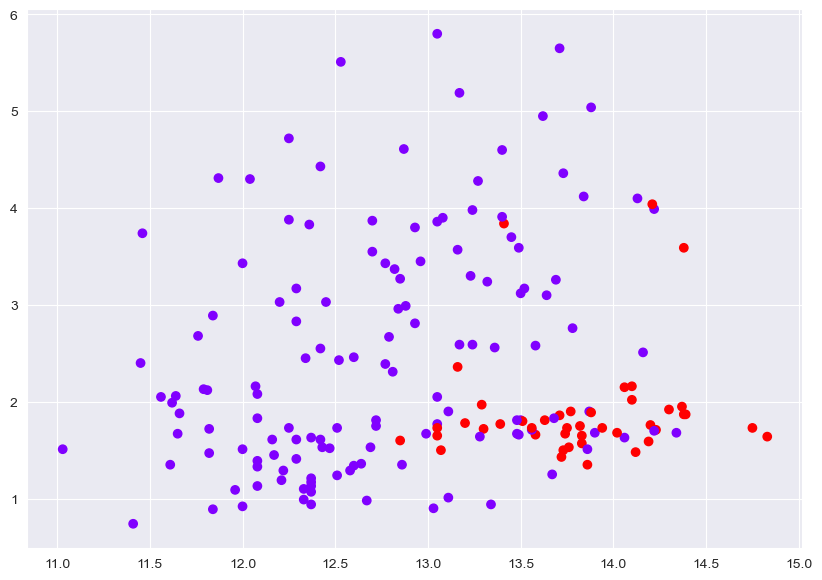

In [144]:
plt.figure(figsize=(10,20))
plt.figure(figsize=(10, 7))  
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=aggc.labels_, cmap='rainbow')  

In [145]:
c=aggc.labels_.sum()

In [146]:
c

43

<Figure size 1000x2000 with 0 Axes>

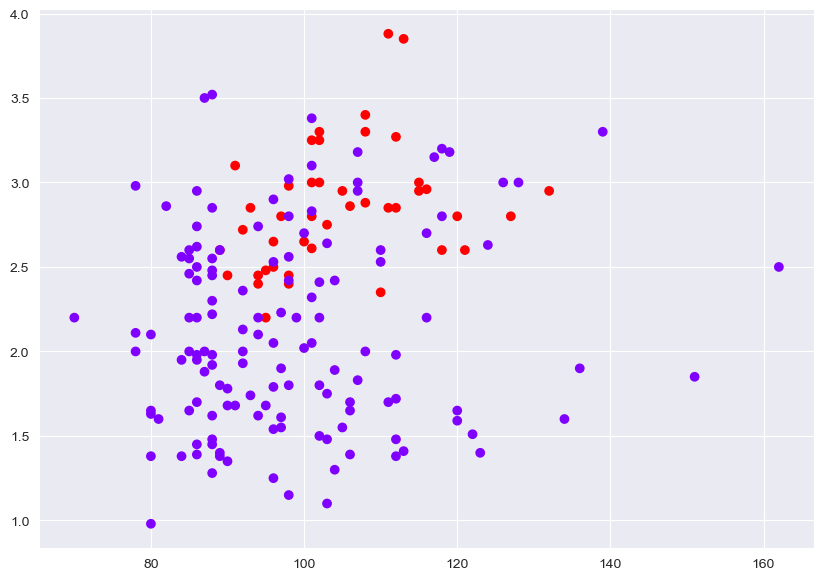

In [147]:
plt.figure(figsize=(10,20))
plt.figure(figsize=(10, 7))  
plt.scatter(X.iloc[:,4], X.iloc[:,5] , c=aggc.labels_, cmap='rainbow')  

In [148]:
X

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      14.23   1.71  2.43        15.6        127     2.80        3.06   
1      13.20   1.78  2.14        11.2        100     2.65        2.76   
2      13.16   2.36  2.67        18.6        101     2.80        3.24   
3      14.37   1.95  2.50        16.8        113     3.85        3.49   
4      13.24   2.59  2.87        21.0        118     2.80        2.69   
..       ...    ...   ...         ...        ...      ...         ...   
173    13.71   5.65  2.45        20.5         95     1.68        0.61   
174    13.40   3.91  2.48        23.0        102     1.80        0.75   
175    13.27   4.28  2.26        20.0        120     1.59        0.69   
176    13.17   2.59  2.37        20.0        120     1.65        0.68   
177    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 13 columns]

In [149]:
#sqare root transformation
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [150]:
#DATA TRANSFORMATION
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
X=MM.fit_transform(X)
X=pd.DataFrame(X)
X

0         1         2         3         4         5         6   \
0    0.842105  0.191700  0.572193  0.257732  0.619565  0.627586  0.573840   
1    0.571053  0.205534  0.417112  0.030928  0.326087  0.575862  0.510549   
2    0.560526  0.320158  0.700535  0.412371  0.336957  0.627586  0.611814   
3    0.878947  0.239130  0.609626  0.319588  0.467391  0.989655  0.664557   
4    0.581579  0.365613  0.807487  0.536082  0.521739  0.627586  0.495781   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.705263  0.970356  0.582888  0.510309  0.271739  0.241379  0.056962   
174  0.623684  0.626482  0.598930  0.639175  0.347826  0.282759  0.086498   
175  0.589474  0.699605  0.481283  0.484536  0.543478  0.210345  0.073840   
176  0.563158  0.365613  0.540107  0.484536  0.543478  0.231034  0.071730   
177  0.815789  0.664032  0.737968  0.716495  0.282609  0.368966  0.088608   

           7         8         9         10        11        12  
0    0.283019  0.593060  0.372014  0.455285  0.970696  0.561341  
1    0.245283  0.274448  0.264505  0.463415  0.780220  0.550642  
2    0.320755  0.757098  0.375427  0.447154  0.695971  0.646933  
3    0.207547  0.558360  0.556314  0.308943  0.798535  0.857347  
4    0.490566  0.444795  0.259386  0.455285  0.608059  0.325963  
..        ...       ...       ...       ...       ...       ...  
173  0.735849  0.205047  0.547782  0.130081  0.172161  0.329529  
174  0.566038  0.315457  0.513652  0.178862  0.106227  0.336662  
175  0.566038  0.296530  0.761092  0.089431  0.106227  0.397290  
176  0.754717  0.331230  0.684300  0.097561  0.128205  0.400856  
177  0.811321  0.296530  0.675768  0.105691  0.120879  0.201141  

[178 rows x 13 columns]

In [151]:
#DATA PARTISION
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [152]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100,
                      max_samples=0.6,
                      max_features=0.7)
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.6)

In [153]:
#prediction
Y_pred_train=RFC.predict(X_train)
Y_pred_test=RFC.predict(X_test)

In [154]:
#model evalution
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
print("Accuracy of training data is",ac1.round(3))
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy of test data is",ac1.round(3))




Accuracy of training data is 1.0
Accuracy of test data is 1.0


In [155]:
from sklearn.metrics import confusion_matrix
ac1=confusion_matrix(Y_train,Y_pred_train)
print("Accuracy of training data is",ac1.round(3))
ac2=confusion_matrix(Y_test,Y_pred_test)
print("Accuracy of test data is",ac1.round(3))



Accuracy of training data is [[97  0]
 [ 0 27]]
Accuracy of test data is [[97  0]
 [ 0 27]]


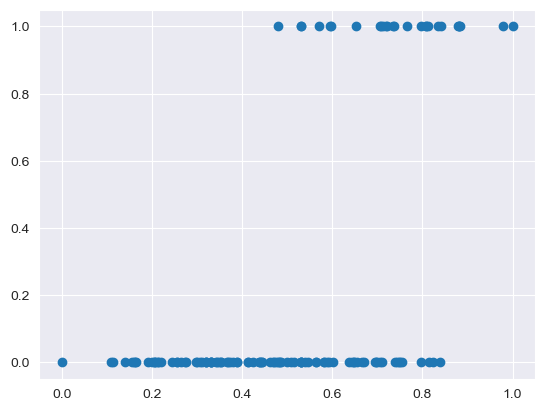

In [156]:
#plot graph
plt.scatter(X_train.iloc[:,0],Y_train)

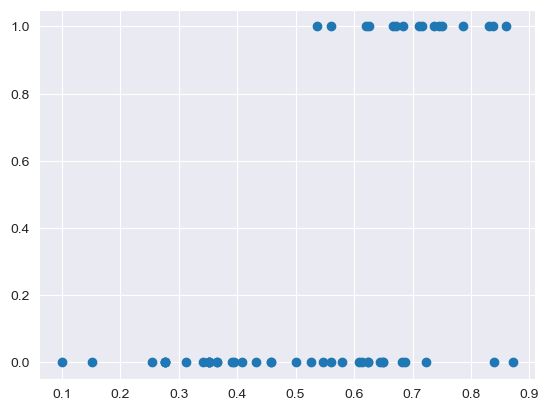

In [157]:
plt.scatter(X_test.iloc[:,0],Y_test)

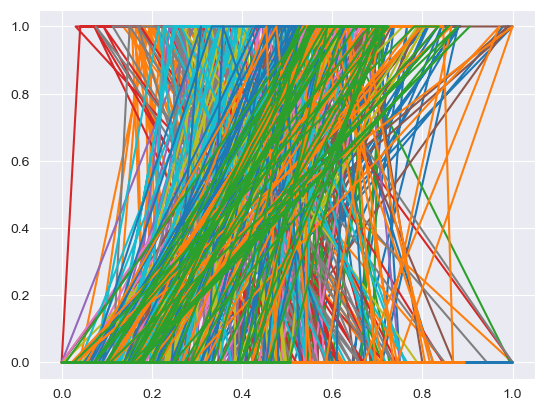

In [158]:
plt.plot(X_train,Y_train)

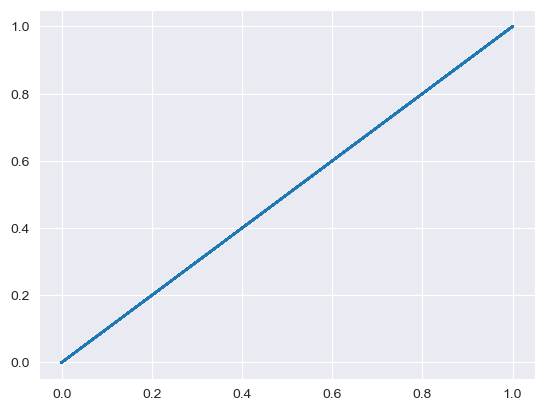

In [159]:
plt.plot(Y_train,Y_pred_train)

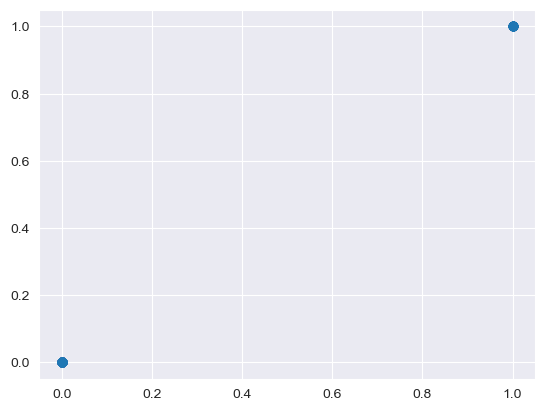

In [160]:
plt.scatter(Y_train,Y_pred_train)

In [161]:
##########################     KMEANS      #########################################

In [167]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
Y=kmeans.fit(X)
Y=Y.predict(X)
Y=pd.DataFrame(Y)
Y

0
0    0
1    0
2    0
3    0
4    0
..  ..
173  1
174  1
175  1
176  1
177  1

[178 rows x 1 columns]

In [168]:
Y[0].value_counts()

2    62
0    61
1    55
Name: 0, dtype: int64

In [169]:
kmeans.inertia_

48.96051713667649

In [170]:

clust = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    clust.append(kmeans.inertia_)


In [171]:
clust

[95.5995377847106,
 64.53766702389431,
 48.96051713667649,
 44.82565025179787,
 42.38580327835326,
 40.14714550556363,
 38.25555549077629,
 36.333712203799024,
 34.66737063619046,
 32.81749901990969]

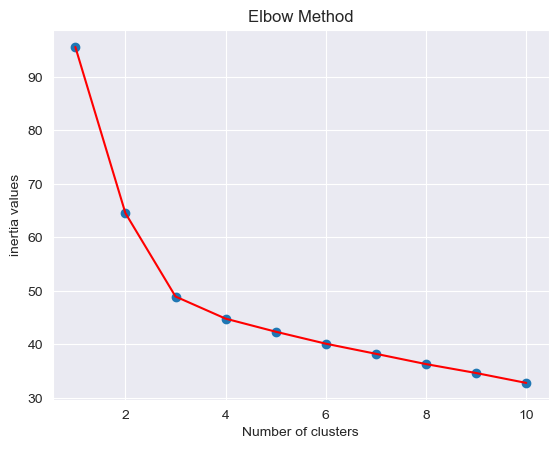

In [172]:
# elbow plot or screeplot
plt.scatter(range(1, 11), clust)
plt.plot(range(1, 11), clust,color="red")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia values')
plt.show()



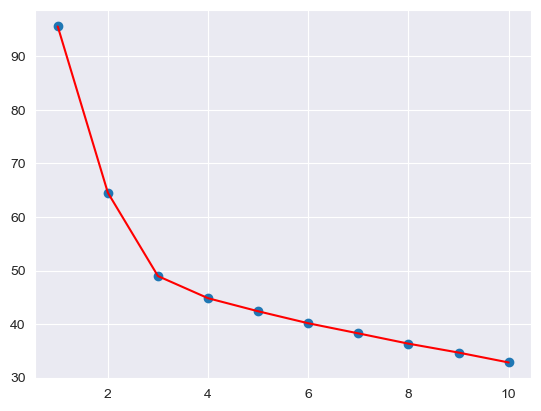

In [173]:
plt.plot(range(1, 11), clust,color="red")
plt.scatter(range(1, 11), clust)

In [174]:
#DATA PARTISION
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [175]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100,
                      max_samples=0.6,
                      max_features=0.7)
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.6)

In [176]:
#prediction
Y_pred_train=RFC.predict(X_train)
Y_pred_test=RFC.predict(X_test)

In [177]:
#model evalution
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
print("Accuracy of training data is",ac1.round(3))
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy of test data is",ac1.round(3))




Accuracy of training data is 1.0
Accuracy of test data is 1.0


In [178]:
from sklearn.metrics import confusion_matrix
ac1=confusion_matrix(Y_train,Y_pred_train)
print("Accuracy of training data is",ac1.round(3))
ac2=confusion_matrix(Y_test,Y_pred_test)
print("Accuracy of test data is",ac1.round(3))



Accuracy of training data is [[42  0  0]
 [ 0 38  0]
 [ 0  0 44]]
Accuracy of test data is [[42  0  0]
 [ 0 38  0]
 [ 0  0 44]]


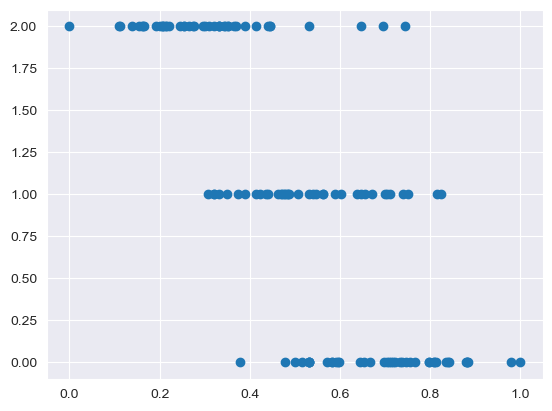

In [179]:
#plot graph
plt.scatter(X_train.iloc[:,0],Y_train)

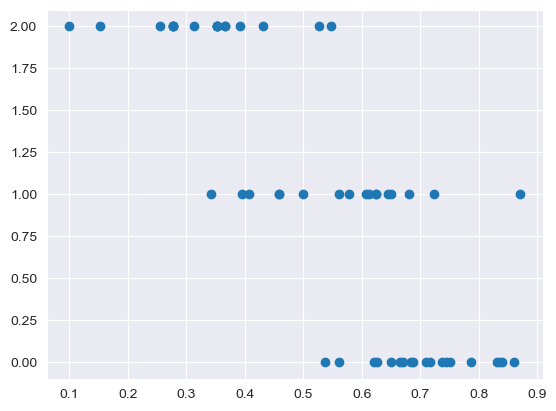

In [180]:
#plot graph
plt.scatter(X_test.iloc[:,0],Y_test)

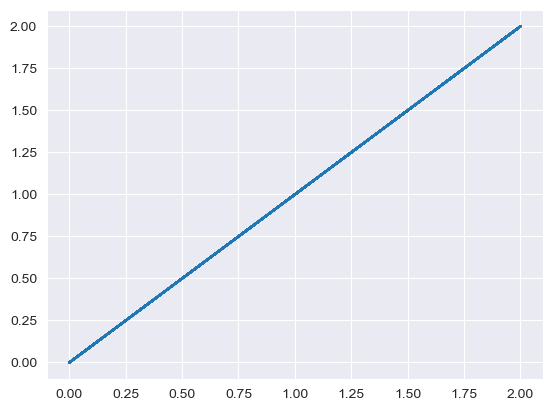

In [181]:
plt.plot(Y_train,Y_pred_train)

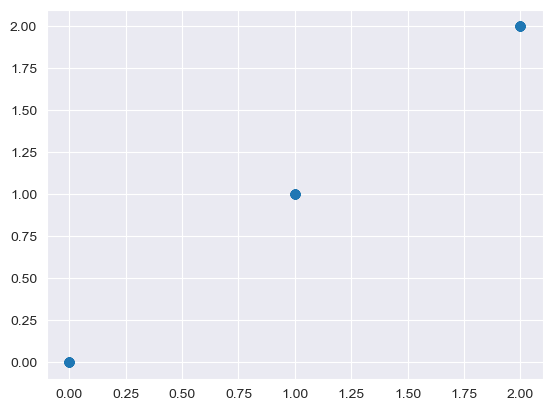

In [182]:
plt.scatter(Y_train,Y_pred_train)

In [183]:
####################################     PCA     ######################################################

In [184]:
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [185]:
X=df.iloc[:,1:]

In [186]:
from sklearn.decomposition import PCA
pca = PCA()

PC = pca.fit_transform(X)
PC = pd.DataFrame(PC)
PC.head()


0          1         2         3         4         5         6   \
0  318.562979  21.492131  3.130735 -0.250114  0.677078  0.568081 -0.619642   
1  303.097420  -5.364718  6.822835 -0.864035 -0.486096  0.014340  0.108865   
2  438.061133  -6.537309 -1.113223  0.912411  0.380651  0.672404  0.785819   
3  733.240139   0.192729 -0.917257 -0.541251  0.858662  0.599122  0.018770   
4  -11.571428  18.489995 -0.554422  1.360896  0.276442  0.768884 -0.309976   

         7         8         9         10        11        12  
0 -0.199555  0.701280 -0.095008  0.088734 -0.038548  0.080264  
1  0.604714  0.286717 -0.045782  0.039778 -0.057192  0.013593  
2 -0.500886  0.024547 -0.208960  0.237770 -0.048798 -0.035408  
3  0.190428  0.054277  0.531684 -0.096044 -0.166353  0.016344  
4  0.119091 -0.195843  0.061771  0.316466 -0.007118  0.015278

In [187]:
var=pca.explained_variance_ratio_
var[0]*100
var[1]*100
var[3]*100

0.005021735618215125

In [188]:
PC.columns=['P0C1', 'P0C2','P0C3','P0C4','P0C5','P0C6','P0C7','P0C8','P096','P0C10','P1C1', 'P1C2','P1C3']

In [189]:
PC

P0C1       P0C2      P0C3      P0C4      P0C5      P0C6      P0C7  \
0    318.562979  21.492131  3.130735 -0.250114  0.677078  0.568081 -0.619642   
1    303.097420  -5.364718  6.822835 -0.864035 -0.486096  0.014340  0.108865   
2    438.061133  -6.537309 -1.113223  0.912411  0.380651  0.672404  0.785819   
3    733.240139   0.192729 -0.917257 -0.541251  0.858662  0.599122  0.018770   
4    -11.571428  18.489995 -0.554422  1.360896  0.276442  0.768884 -0.309976   
..          ...        ...       ...       ...       ...       ...       ...   
173   -6.980211  -4.541137 -2.474707 -3.155920 -2.348927  1.439001 -0.026425   
174    3.131605   2.335191 -4.309931 -1.562181 -1.168003  0.128679  0.003859   
175   88.458074  18.776285 -2.237577 -4.820708 -1.057336  0.215000  0.648489   
176   93.456242  18.670819 -1.788392 -3.709352 -0.276956 -1.009229  0.414948   
177 -186.943190  -0.213331 -5.630510 -3.472987  0.007035  0.703636 -0.693761   

         P0C8      P096     P0C10      P1C1      P1C2      P1C3  
0   -0.199555  0.701280 -0.095008  0.088734 -0.038548  0.080264  
1    0.604714  0.286717 -0.045782  0.039778 -0.057192  0.013593  
2   -0.500886  0.024547 -0.208960  0.237770 -0.048798 -0.035408  
3    0.190428  0.054277  0.531684 -0.096044 -0.166353  0.016344  
4    0.119091 -0.195843  0.061771  0.316466 -0.007118  0.015278  
..        ...       ...       ...       ...       ...       ...  
173  0.043705  0.040167  0.087377  0.016509  0.098355  0.027251  
174 -0.303185 -0.159759  0.159510 -0.048916  0.012626 -0.042645  
175  0.068966  0.273675 -0.045336 -0.223049  0.096049  0.036175  
176 -0.145647  0.254468  0.059211 -0.030408 -0.052089  0.132759  
177 -0.242247 -0.123226  0.299080  0.160725  0.031920  0.026937  

[178 rows x 13 columns]

In [190]:
import seaborn as sns

In [191]:
import seaborn as sns  #
df1 = pd.DataFrame({'var':(pca.explained_variance_ratio_)*100,
                  'PC':['P0C1', 'P0C2','P0C3','P0C4','P0C5','P0C6','P0C7','P0C8','P096','P0C10','P1C1', 'P1C2','P1C3']})

In [192]:
df1

var     PC
0   99.809123   P0C1
1    0.173592   P0C2
2    0.009496   P0C3
3    0.005022   P0C4
4    0.001236   P0C5
5    0.000846   P0C6
6    0.000281   P0C7
7    0.000152   P0C8
8    0.000113   P096
9    0.000072  P0C10
10   0.000038   P1C1
11   0.000021   P1C2
12   0.000008   P1C3

<AxesSubplot:xlabel='PC', ylabel='var'>

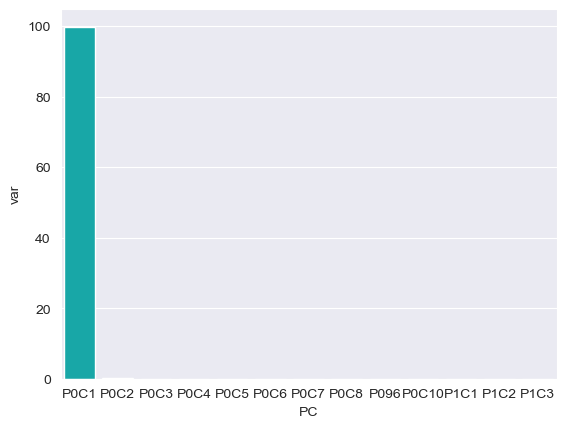

In [193]:
sns.barplot(x='PC',y="var", data=df1, color="c")

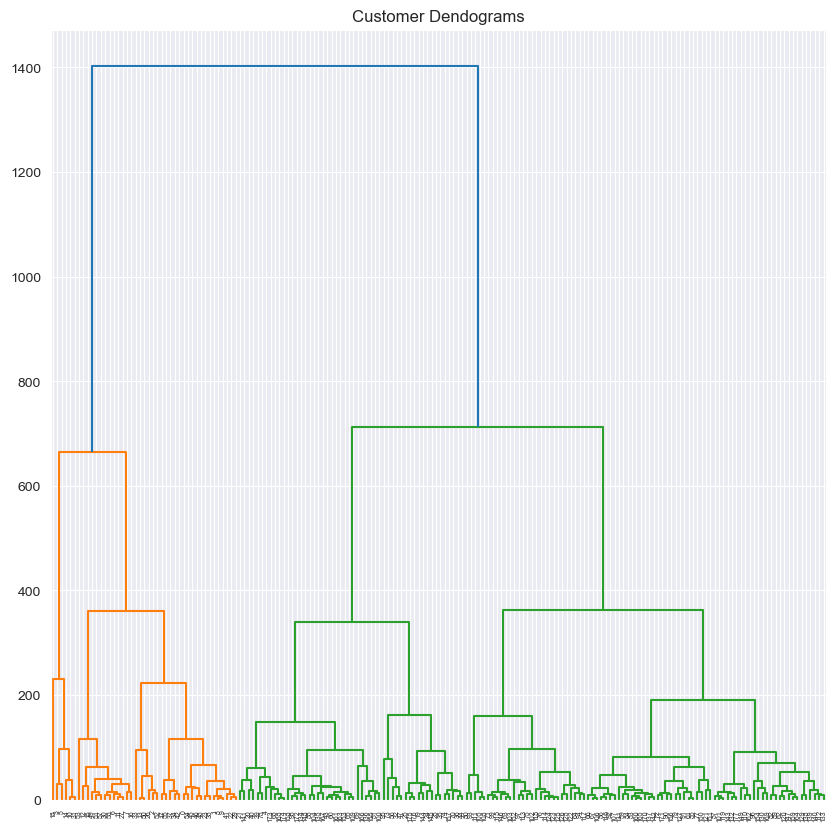

In [194]:
import scipy.cluster.hierarchy as shc

X=PC.iloc[:,0:]

plt.figure(figsize=(10, 10))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(X, method='complete')) 


In [195]:
# forming grouping of clusters
from sklearn.cluster import AgglomerativeClustering
aggc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")
aggc

Y=aggc.fit(X)
Y=aggc.fit_predict(X)

Y=pd.DataFrame(Y)


Y

Y[0].value_counts()


1    83
2    52
0    43
Name: 0, dtype: int64

In [196]:
################### kmeans #######################

In [197]:

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
Y=kmeans.fit(X)
Y=Y.predict(X)
Y=pd.DataFrame(Y)
Y

Y[0].value_counts()

kmeans.inertia_


2370689.6867829687

In [198]:
Y[0].value_counts()

2    69
0    62
1    47
Name: 0, dtype: int64

In [199]:
clust = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    clust.append(kmeans.inertia_)


clust

[17592296.38350848,
 4543749.614531863,
 2370689.6867829687,
 1331903.0622637179,
 916379.1871539173,
 647326.002026085,
 412137.5091004585,
 324523.62500019546,
 270954.92924153747,
 217887.3785603331]

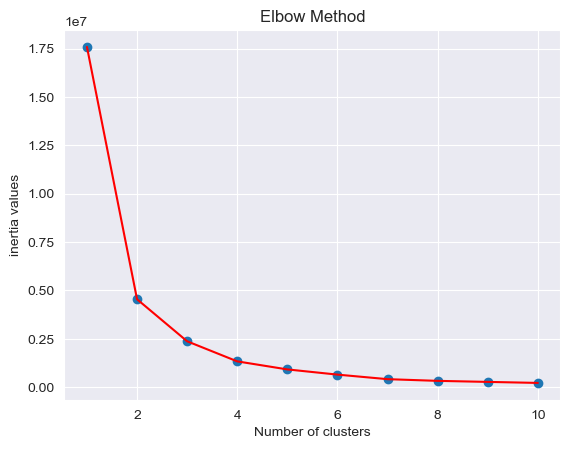

In [200]:
# elbow plot or screeplot
plt.scatter(range(1, 11), clust)
plt.plot(range(1, 11), clust,color="red")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia values')
plt.show()


In [201]:
####no performing model eavlujtion on pca values and y values#############

In [202]:
X=PC.iloc[:,0:4]
X

P0C1       P0C2      P0C3      P0C4
0    318.562979  21.492131  3.130735 -0.250114
1    303.097420  -5.364718  6.822835 -0.864035
2    438.061133  -6.537309 -1.113223  0.912411
3    733.240139   0.192729 -0.917257 -0.541251
4    -11.571428  18.489995 -0.554422  1.360896
..          ...        ...       ...       ...
173   -6.980211  -4.541137 -2.474707 -3.155920
174    3.131605   2.335191 -4.309931 -1.562181
175   88.458074  18.776285 -2.237577 -4.820708
176   93.456242  18.670819 -1.788392 -3.709352
177 -186.943190  -0.213331 -5.630510 -3.472987

[178 rows x 4 columns]

In [203]:
Y=df["Type"]

In [204]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

In [205]:
#DATA PARTISION
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100,
                      max_samples=0.6,
                      max_features=0.7)
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.6)

In [206]:
#prediction
Y_pred_train=RFC.predict(X_train)
Y_pred_test=RFC.predict(X_test)

#model evalution
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
print("Accuracy of training data is",ac1.round(3))
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy of test data is",ac1.round(3))


Accuracy of training data is 1.0
Accuracy of test data is 1.0


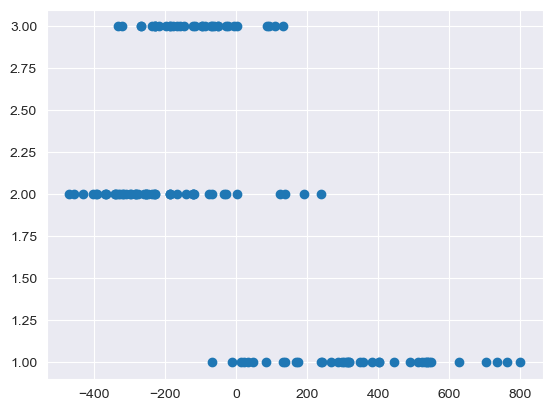

In [207]:

#plot graph
plt.scatter(X_train.iloc[:,0],Y_train)


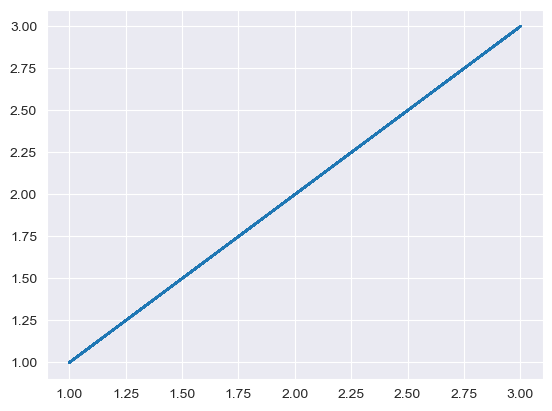

In [208]:
plt.plot(Y_train,Y_pred_train)


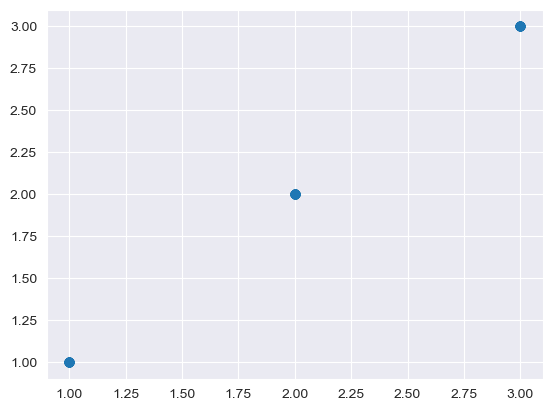

In [209]:
plt.scatter(Y_train,Y_pred_train)

In [ ]:
# I HAVE PERMOERM THE CLUSTER ANALYSIS ON ORIGANAL DATA IT SHOWS 3 CLUSTER FORM AND THEN I PERFOMRM PCA AND ON THAT DATA I HAVE AGAIN PERFOM CLUSTERING IT ALSO GIVE 3 CLUSTERS .AND FINALLY FIND THE ACCURACY OF DATA USING PRINCIPLE COMPONENT AND CLASS VARIABLE